# Importing & Cleaning the Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [34]:
#read in CSV files
trainers = pd.read_csv("Trainers.csv")
pokemon = pd.read_csv("pokemon.csv")

#lower-casing all strings for both data frames
trainer_classes = trainers.loc[:,"Class"].str.lower()
trainers["Pkmn1"] = trainers["Pkmn1"].str.lower()
trainers["Pkmn2"] = trainers["Pkmn2"].str.lower()
trainers["Pkmn3"] = trainers["Pkmn3"].str.lower()
trainers["Pkmn4"] = trainers["Pkmn4"].str.lower()
trainers["Pkmn5"] = trainers["Pkmn5"].str.lower()
trainers["Pkmn6"] = trainers["Pkmn6"].str.lower()

pokemon.loc[:, "name"] = pokemon.loc[:, "name"].str.lower()


#removing possible whitespace
trainers["Pkmn1"] = trainers["Pkmn1"].str.strip()
trainers["Pkmn2"] = trainers["Pkmn2"].str.strip()
trainers["Pkmn3"] = trainers["Pkmn3"].str.strip()
trainers["Pkmn4"] = trainers["Pkmn4"].str.strip()
trainers["Pkmn5"] = trainers["Pkmn5"].str.strip()
trainers["Pkmn6"] = trainers["Pkmn6"].str.strip()

#first_pokemon = trainers.loc[:, "Pkmn1"].str.lower() 
pokemon.head()
trainer_classes.head()

0    beauty
1    beauty
2    beauty
3    beauty
4    beauty
Name: Class, dtype: object

# Removing Trainer Classes that have too little instances

In [35]:
#get the count for each class
def get_trainer_class_count(c):
    trainer_list = trainers[trainers['Class'] == c]
    return trainer_list.shape[0]

#get unique classes and store in list
classes = []
for index, trainer_class in trainer_classes.items():
    if trainer_class not in classes:
        classes.append(trainer_class)
        
#trying to see the counts for each class to clean out some data
less_than_10 = []
all_counts = []
for c in classes:
    count = get_trainer_class_count(c)
    print(c + " " + str(count))
    all_counts.append(count)
    if count < 10:
       less_than_10.append(c)

beauty 86
biker 72
bird keeper 178
black belt 131
bug catcher 132
burglar 19
channeler 31
ace trainer 372
roughneck 24
engineer 8
fisherman 192
gambler 22
gentleman 58
hiker 172
juggler 29
lass 132
poke maniac 73
psychic 144
rocker 7
sailor 97
scientist 59
super nerd 38
tamer 13
youngster 145
boarder 8
camper 125
firebreather 19
guitarist 42
kimono girl 10
medium 10
officer 22
picnicker 184
pokefan 78
rocket grunt 157
sage 18
schoolboy 96
skier 37
swimmer 311
teacher 10
twins 48
mysticalman 2
aqua admin 4
aqua leader 2
aroma lady  7
battle girl 9
bug maniac 8
collector 7
dragon tamer 6
expert 10
hex maniac 9
interviewer  5
kindler 8
lady 7
magma admin 4
magma leader 2
ninja boy 11
old couple 5
parasol lady 7
pokemon breeder 10
pokemon ranger 14
rich boy 6
ruin maniac 7
sis and bro 7
sr. and jr. 8
team aqua grunt 21
team magma grunt 21
triathlete 36
tuber 15
winstrate 4
young couple 8
artist 11
belle & pa 4
cameraman 9
clown 6
commander 16
cowgirl 2
cyclist 27
double team 9
galactic gru

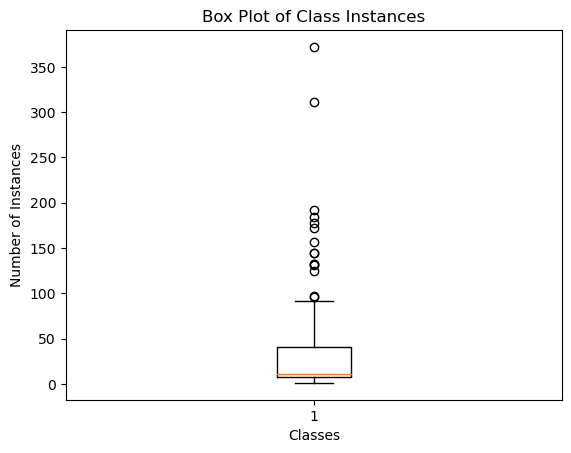

In [36]:
#basic summary stats
stats = pd.Series(all_counts)
#stats.head
stats.describe()

fig, ax = plt.subplots()
ax.boxplot(stats)
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Box Plot of Class Instances')

plt.show()

In [37]:
#drop some rows that have less than 10 trainers in a given column
for index, trainer_class in trainer_classes.items():
    if trainer_class in less_than_10:
        trainer_classes = trainer_classes.drop(index)
        trainers = trainers.drop(index)
        
        
#re-read the classes after dropping rows
classes = []
for index, trainer_class in trainer_classes.items():
    if trainer_class not in classes:
        classes.append(trainer_class)
        
print(classes)
len(classes)

['beauty', 'biker', 'bird keeper', 'black belt', 'bug catcher', 'burglar', 'channeler', 'ace trainer', 'roughneck', 'fisherman', 'gambler', 'gentleman', 'hiker', 'juggler', 'lass', 'poke maniac', 'psychic', 'sailor', 'scientist', 'super nerd', 'tamer', 'youngster', 'camper', 'firebreather', 'guitarist', 'kimono girl', 'medium', 'officer', 'picnicker', 'pokefan', 'rocket grunt', 'sage', 'schoolboy', 'skier', 'swimmer', 'teacher', 'twins', 'expert', 'ninja boy', 'pokemon breeder', 'pokemon ranger', 'team aqua grunt', 'team magma grunt', 'triathlete', 'tuber', 'artist', 'commander', 'cyclist', 'galactic grunt', 'jogger', 'poke kid', 'veteran']


52

# Creating a dictionary (class_dict) to retrieve nested list of teams for each class

In [38]:
#creates a dictionary where key=class name, value = [[]] of pokemon teams
def get_class_pokemon(c):
    l = []

    for index, trainer_class in trainer_classes.items():
        if trainer_class == c:
            temp = []
            temp.append(trainers.loc[index,"Pkmn1"])

            if str(trainers.loc[index, "Pkmn2"]) != 'nan':
                temp.append(trainers.loc[index,"Pkmn2"])
            if str(trainers.loc[index, "Pkmn3"]) != 'nan':
                temp.append(trainers.loc[index,"Pkmn3"])
            if str(trainers.loc[index, "Pkmn4"]) != 'nan':
                temp.append(trainers.loc[index,"Pkmn4"])
            if str(trainers.loc[index, "Pkmn5"]) != 'nan':
                temp.append(trainers.loc[index,"Pkmn5"])
            if str(trainers.loc[index, "Pkmn6"]) != 'nan':
                temp.append(trainers.loc[index,"Pkmn6"])
            l.append(temp)

    return l

class_dict = {}
for c in classes:
    class_dict[c] = get_class_pokemon(c)

In [39]:
#https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values
pokemon['typing'] = pokemon['type1'].fillna('') + '/' + pokemon['type2'].fillna('')
pokemon['typing'] = pokemon['typing'].apply(lambda x: x.rstrip('/'))

#store pokemon name + index into a DF
poke_name = pokemon.loc[:,['name','typing']]
poke_name.head()

,name,typing
0,bulbasaur,grass/poison
1,ivysaur,grass/poison
2,venusaur,grass/poison
3,charmander,fire
4,charmeleon,fire


# finding the number of elemental types that appear with trainer classes

In [40]:
def return_type(name):
    if len(pokemon.index[poke_name['name'].str.contains(name)]) != 0:
        index = pokemon.index[poke_name['name'].str.contains(name)]
    #print(type(poke_name.iloc[index[0]][1]), type(poke_name.iloc[index[0]][2]))
    #print(poke_name.iloc[index[0]][2])
        return poke_name.iloc[index[0]][1]
    else:
        #fail safe
        return name

In [41]:
#return the dictionary of elemental types and number of instances for a given trainer class
def create_type_dictionary(class_name):
    #stores the nested lists of pokemon for a given trainer class
    team_list = class_dict[class_name]
    d = {}
    for teams in range(len(team_list)):
        length = len(team_list[teams])
    
        for pkmn in range(length):
            curr_pokemon = team_list[teams][pkmn]
            element_typing = return_type(curr_pokemon)
            
            
            if element_typing in d.keys():
                d[element_typing] = d[element_typing] + 1
            else:
                d[element_typing] = 1
    return d

In [42]:
biker_dict = create_type_dictionary('biker')
for key, value in biker_dict.items():
    print(key, value)

poison 132
electric 4
fire 12
fairy 1
water/poison 6
psychic 3
normal 4
water/fairy 4
poison/bug 1
poison/fighting 1


In [43]:
psychic = create_type_dictionary('psychic')
for key, value in psychic.items():
    print(key, value)

water/psychic 24
psychic/fairy 31
psychic 107
psychic/flying 21
grass/psychic 12
normal/psychic 10
rock/psychic 24
ghost 20
ghost/poison 18
normal 1
fighting/psychic 5
water 2
ground/psychic 1
ghost/flying 3
psychic/fighting 3
dark 1


In [44]:
pokefan_dict = create_type_dictionary('pokefan')
for key, value in pokefan_dict.items():
    print(key, value)

poison/ground 3
water/psychic 3
water 9
normal 48
fairy 9
grass/poison 2
fire 2
ice/flying 2
electric 58
ground 1
water/ground 2
normal/fairy 2
water/fairy 5
psychic 6
rock 2
bug 2


In [45]:
ninja_boy_dict = create_type_dictionary('ninja boy')
for key, value in ninja_boy_dict.items():
    print(key, value)

poison 25
bug/flying 5
bug/ground 3


In [46]:
guitarist_dict = create_type_dictionary('guitarist')
for key, value in guitarist_dict.items():
    print(key, value)

electric 35
electric/steel 28
normal 15
poison/flying 2
normal/water 1
bug 7


In [47]:
fisherman_dict = create_type_dictionary('fisherman')
for key,value in fisherman_dict.items():
    print(key, value)

water 329
water/poison 80
water/ice 6
water/flying 78
water/dark 16
water/ground 17
water/electric 1
water/rock 4


In [48]:
#convert dictionary to dataframes

#biker_dict
#pokefan_dict
#ninja_boy_dict
#guitarist_dict

biker_data = {'type': biker_dict.keys(), 'frequency': biker_dict.values()}
biker_df = pd.DataFrame(biker_data)


pokefan_data = {'type': pokefan_dict.keys(), 'frequency': pokefan_dict.values()}
pokefan_df = pd.DataFrame(pokefan_data)

ninja_boy_data = {'type': ninja_boy_dict.keys(), 'frequency': ninja_boy_dict.values()}
ninja_boy_df = pd.DataFrame(ninja_boy_data)

guitarist_data = {'type': guitarist_dict.keys(), 'frequency': guitarist_dict.values()}
guitarist_df = pd.DataFrame(guitarist_data)


fisherman_data = {'type': fisherman_dict.keys(), 'frequency': fisherman_dict.values()}
fisherman_df = pd.DataFrame(fisherman_data)
#biker_df.head()
#fisherman_df.head()
#pokefan_df.head()
#ninja_boy_df.head()
guitarist_df.head()

,type,frequency
0,electric,35
1,electric/steel,28
2,normal,15
3,poison/flying,2
4,normal/water,1


# Visualization

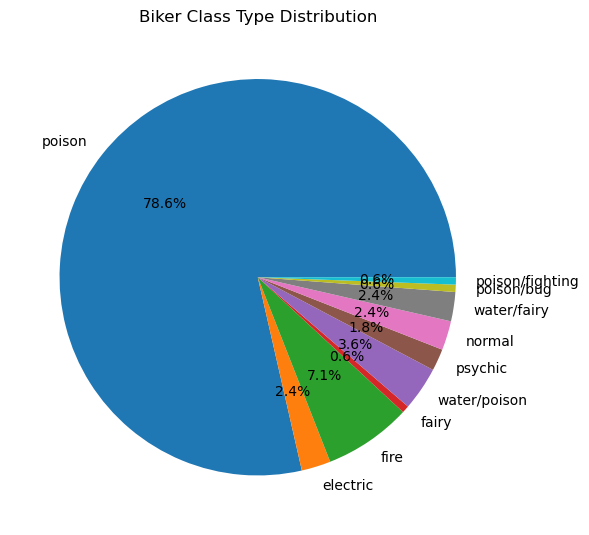

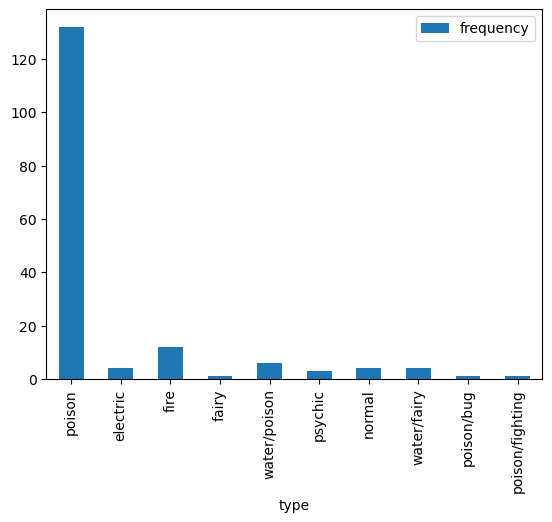

In [49]:
# for biker class

labels = biker_dict.keys()
x = biker_dict.values()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Biker Class Type Distribution')
plt.tight_layout()
biker_df.plot(x='type', y='frequency', kind='bar')
plt.show()

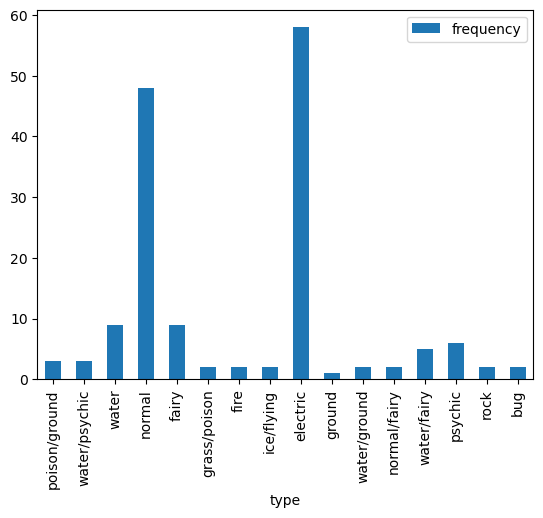

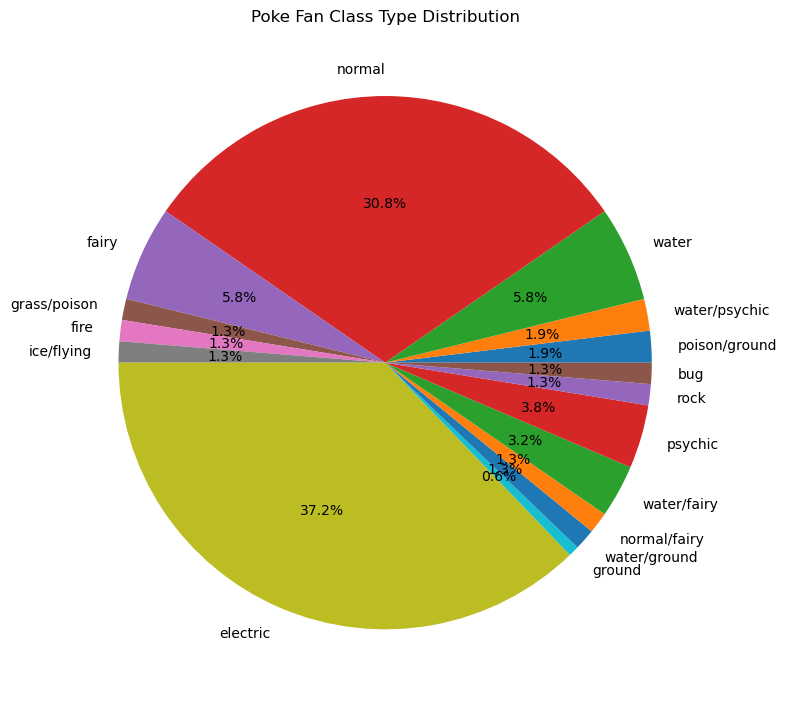

In [50]:
# for pokefan class
pokefan_df.plot(x='type', y='frequency', kind='bar')
plt.show()

labels = pokefan_dict.keys()
x = pokefan_dict.values()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Poke Fan Class Type Distribution')
plt.tight_layout()

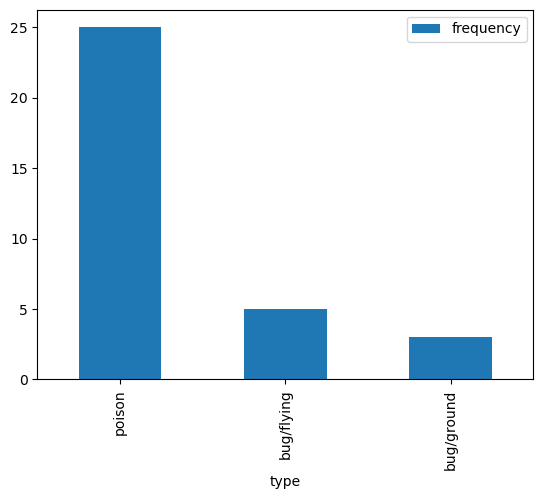

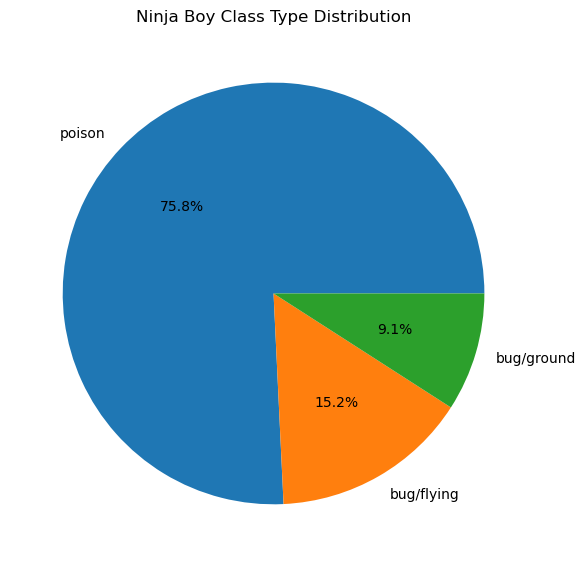

In [51]:
#for ninja boy class
ninja_boy_df.plot(x='type', y='frequency', kind='bar')
plt.show()

labels = ninja_boy_dict.keys()
x = ninja_boy_dict.values()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Ninja Boy Class Type Distribution')
plt.tight_layout()

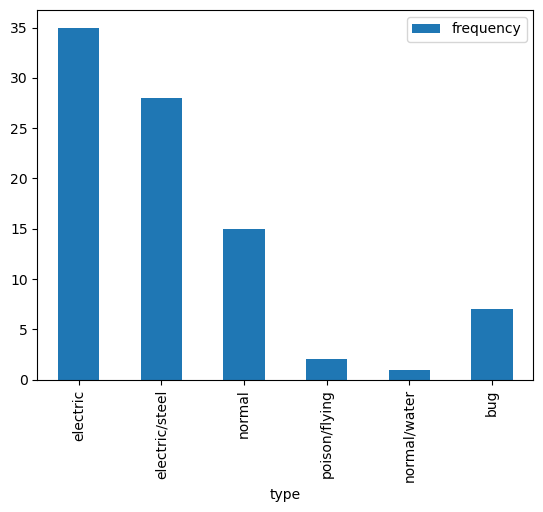

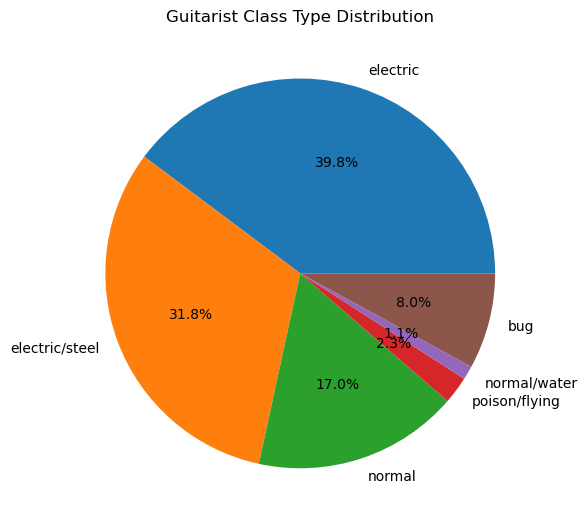

In [52]:
#for guitarist class
guitarist_df.plot(x='type', y='frequency', kind='bar')
plt.show()

labels = guitarist_dict.keys()
x = guitarist_dict.values()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Guitarist Class Type Distribution')
plt.tight_layout()

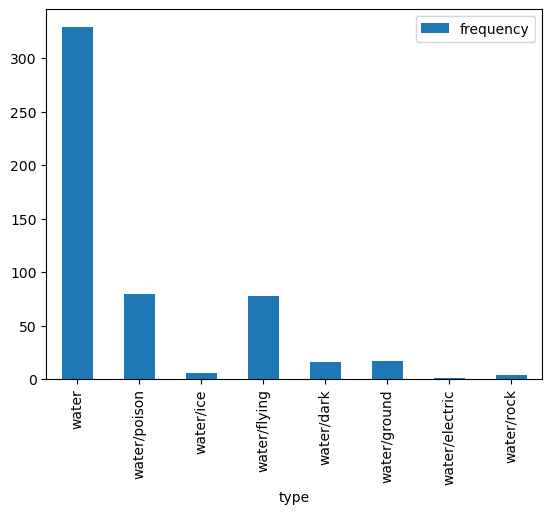

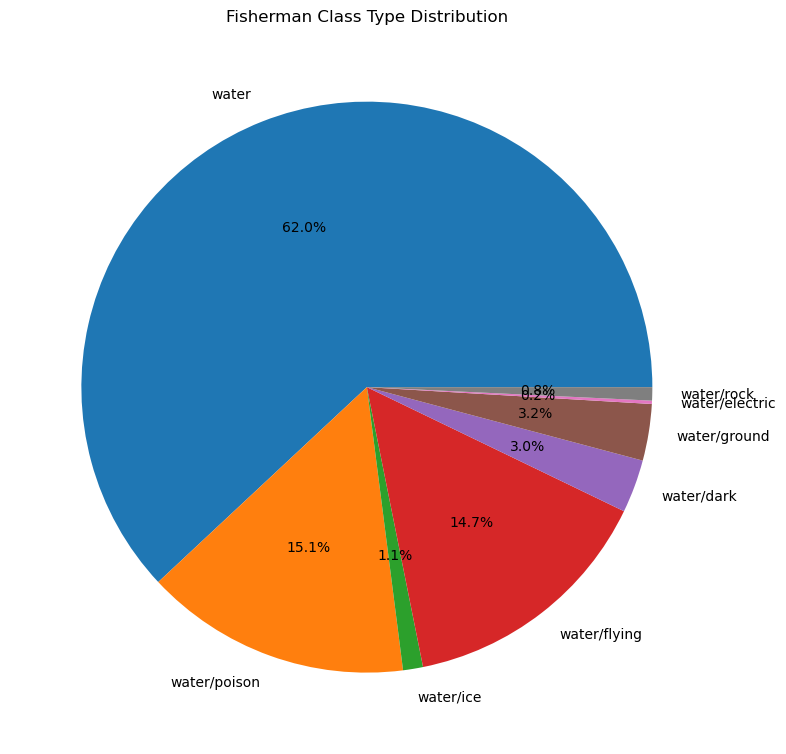

In [53]:
#for fisherman class
fisherman_df.plot(x='type', y='frequency', kind='bar')
plt.show()

labels = fisherman_dict.keys()
x = fisherman_dict.values()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Fisherman Class Type Distribution')
plt.tight_layout()

In [54]:
# checking for null values
#pokemon.isnull().any()

pokemon.isnull().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_total            0
capture_rate          0
defense               0
height_m              0
hp                    0
name                  0
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2               255
weight_kg             0
is_legendary          0
typing                0
dtype: int64

# Standardizing Statistics & Visualizing Effects

In [55]:
#493 instances in pokemon dataframe
qt = QuantileTransformer(n_quantiles=493,output_distribution='normal')
pt = PowerTransformer()
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()

pokemon[['s_attack', 's_defense', 's_base_total','s_height_m', 's_hp','s_weight_kg', 's_speed', 's_sp_attack', 's_sp_defense']] = scaler1.fit_transform(pokemon[['attack', 'defense', 'base_total', 'height_m', 'hp', 'weight_kg', 'speed', 'sp_attack', 'sp_defense']])
pokemon[['m_attack', 'm_defense', 'm_base_total','m_height_m', 'm_hp','m_weight_kg', 'm_speed', 'm_sp_attack', 'm_sp_defense']] = scaler2.fit_transform(pokemon[['attack', 'defense', 'base_total', 'height_m', 'hp', 'weight_kg', 'speed', 'sp_attack', 'sp_defense']])
pokemon[['r_attack', 'r_defense', 'r_base_total','r_height_m', 'r_hp','r_weight_kg', 'r_speed', 'r_sp_attack', 'r_sp_defense']] = scaler3.fit_transform(pokemon[['attack', 'defense', 'base_total', 'height_m', 'hp', 'weight_kg', 'speed', 'sp_attack', 'sp_defense']])
pokemon['p_attack'] = pt.fit_transform(pokemon[['attack']])
pokemon['p_defense'] = pt.fit_transform(pokemon[['defense']])
pokemon['p_base_total'] = pt.fit_transform(pokemon[['base_total']])
pokemon['p_height_m'] = pt.fit_transform(pokemon[['height_m']])
pokemon['p_hp'] = pt.fit_transform(pokemon[['hp']])
pokemon['p_weight_kg'] = pt.fit_transform(pokemon[['weight_kg']])
pokemon['p_speed'] = pt.fit_transform(pokemon[['speed']])
pokemon['p_sp_attack'] = pt.fit_transform(pokemon[['sp_attack']])
pokemon['p_sp_defense'] = pt.fit_transform(pokemon[['sp_defense']])
pokemon['q_base_total'] = qt.fit_transform(pokemon[['base_total']])
pokemon['q_height_m'] = qt.fit_transform(pokemon[['height_m']])
pokemon['q_hp'] = qt.fit_transform(pokemon[['hp']])
pokemon['q_weight_kg'] = qt.fit_transform(pokemon[['weight_kg']])
pokemon['q_speed'] = qt.fit_transform(pokemon[['speed']])
pokemon['q_sp_attack'] = qt.fit_transform(pokemon[['sp_attack']])
pokemon['q_sp_defense'] = qt.fit_transform(pokemon[['sp_defense']])

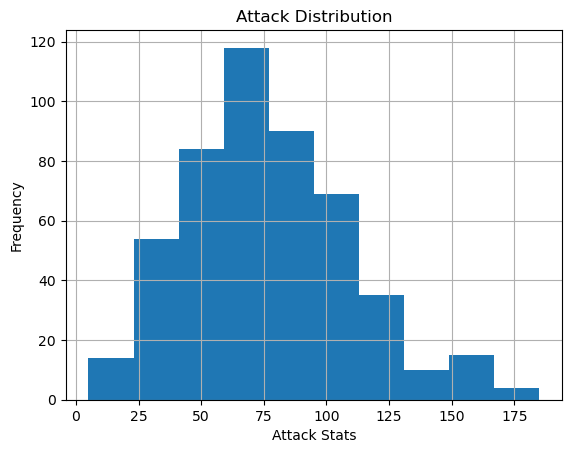

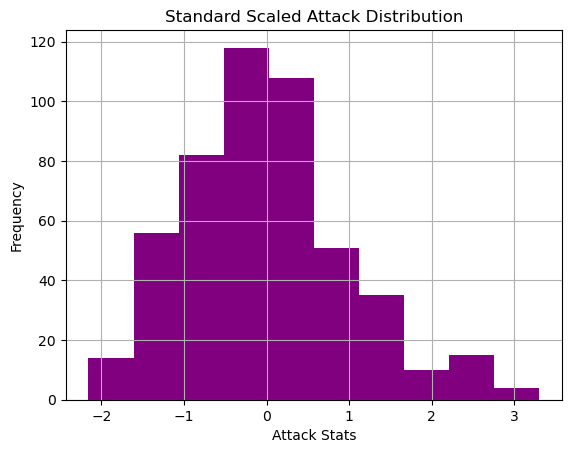

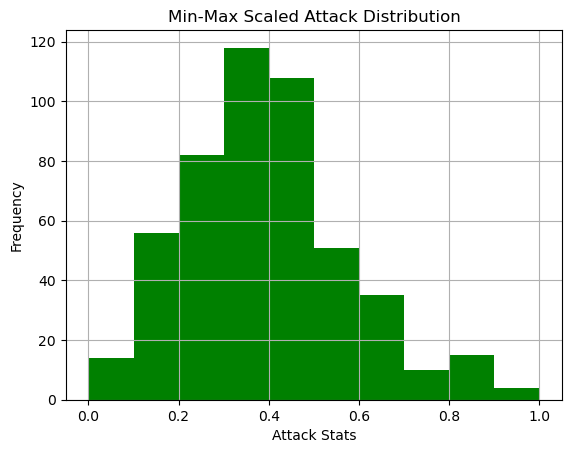

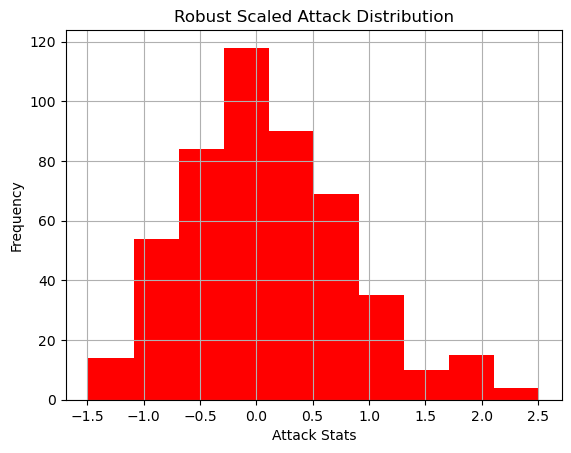

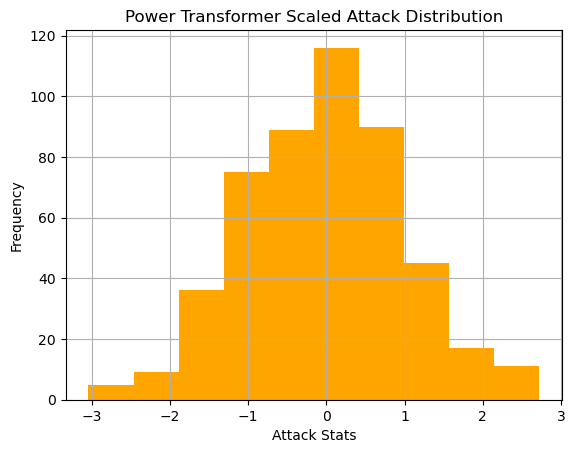

In [56]:
#standardizing stats
pokemon['attack'].hist()
plt.xlabel('Attack Stats')
plt.ylabel('Frequency')
plt.title('Attack Distribution')
plt.show()

pokemon['s_attack'].hist(color='purple')
plt.xlabel('Attack Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaled Attack Distribution')
plt.show()

pokemon['m_attack'].hist(color='green')
plt.xlabel('Attack Stats')
plt.ylabel('Frequency')
plt.title('Min-Max Scaled Attack Distribution')
plt.show()

pokemon['r_attack'].hist(color='red')
plt.xlabel('Attack Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Attack Distribution')
plt.show()

pokemon['p_attack'].hist(color='orange')
plt.xlabel('Attack Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Attack Distribution')
plt.show()

#power transformer

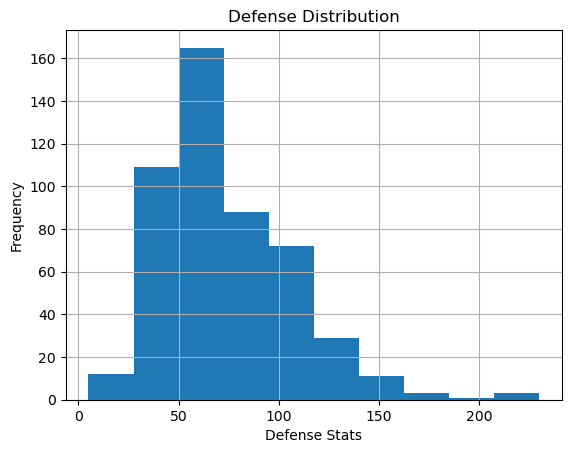

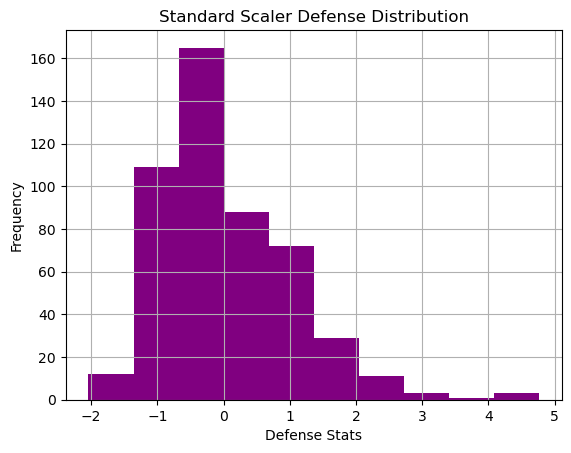

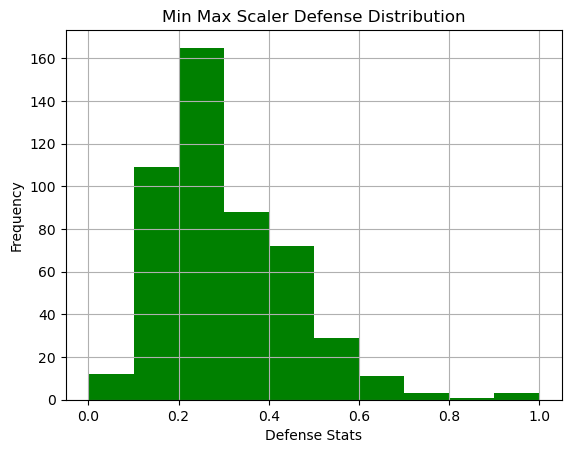

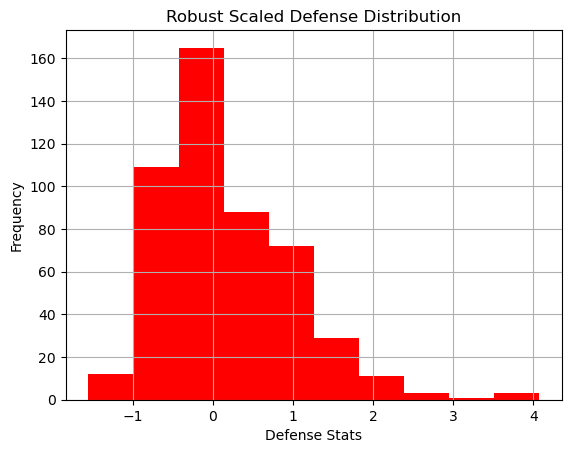

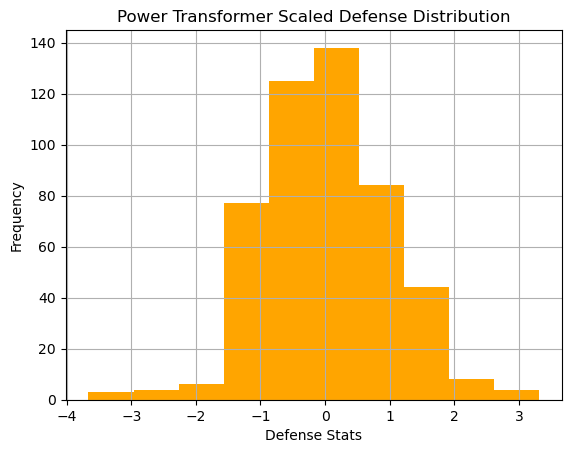

In [57]:
pokemon['defense'].hist()
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Defense Distribution')
plt.show()

pokemon['s_defense'].hist(color='purple')
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Defense Distribution')
plt.show()

pokemon['m_defense'].hist(color='green')
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Defense Distribution')
plt.show()

pokemon['r_defense'].hist(color='red')
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Defense Distribution')
plt.show()

pokemon['p_defense'].hist(color='orange')
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Defense Distribution')
plt.show()
#power transformer

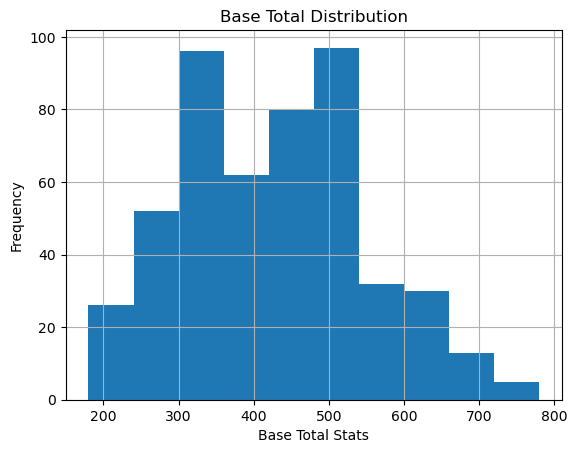

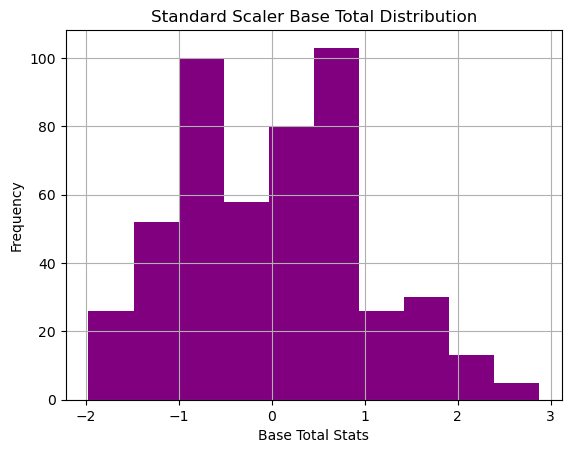

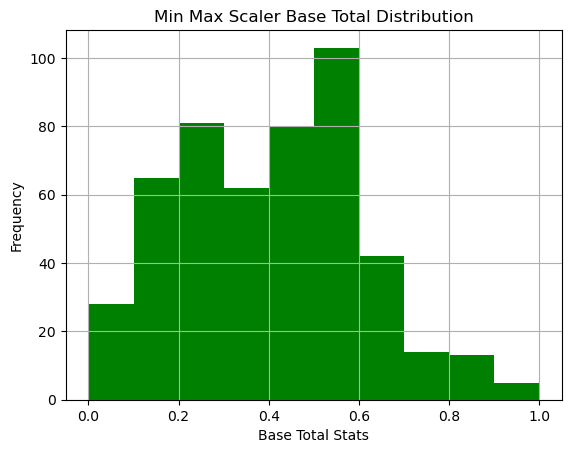

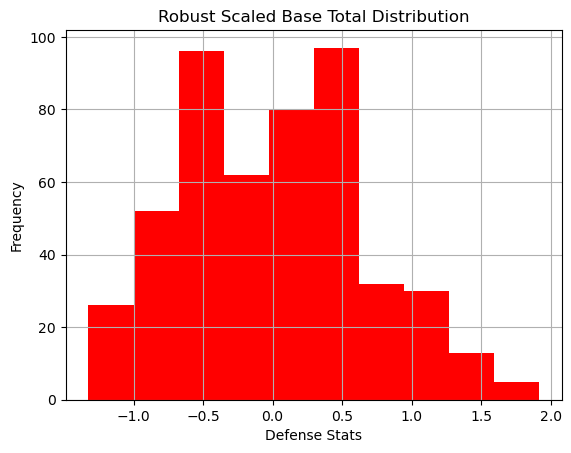

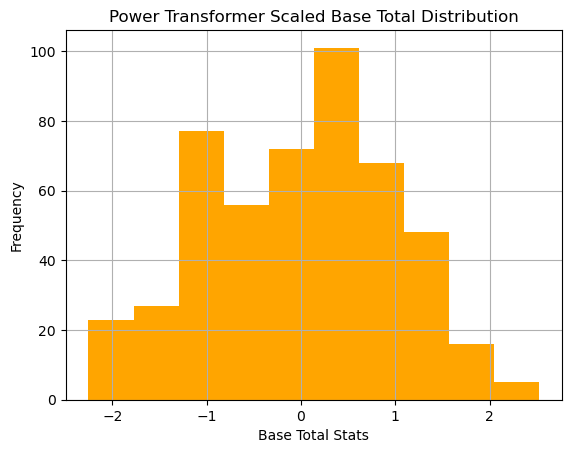

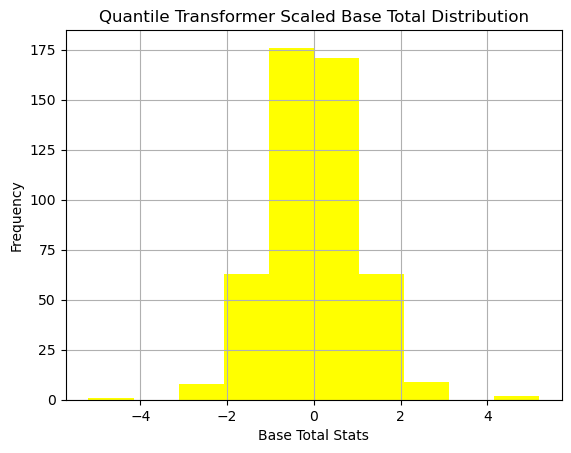

In [58]:
pokemon['base_total'].hist()
plt.xlabel('Base Total Stats')
plt.ylabel('Frequency')
plt.title('Base Total Distribution')
plt.show()

pokemon['s_base_total'].hist(color='purple')
plt.xlabel('Base Total Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Base Total Distribution')
plt.show()

pokemon['m_base_total'].hist(color='green')
plt.xlabel('Base Total Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Base Total Distribution')
plt.show()

pokemon['r_base_total'].hist(color='red')
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Base Total Distribution')
plt.show()
#they all look pretty bad

pokemon['p_base_total'].hist(color='orange')
plt.xlabel('Base Total Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Base Total Distribution')
plt.show()
#the power transformer definitely made a difference and made it more unimodal

pokemon['q_base_total'].hist(color='yellow')
plt.xlabel('Base Total Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled Base Total Distribution')
plt.show()
#power transformer

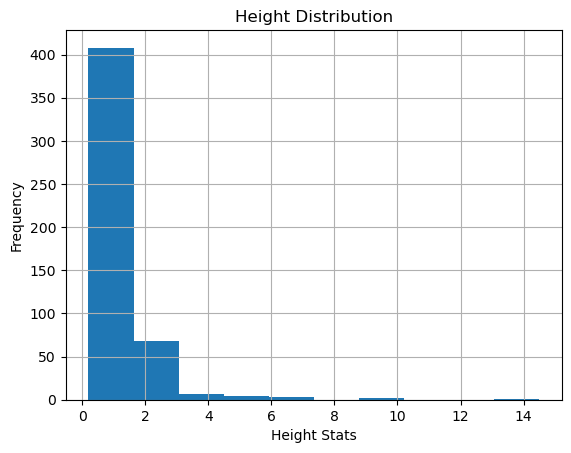

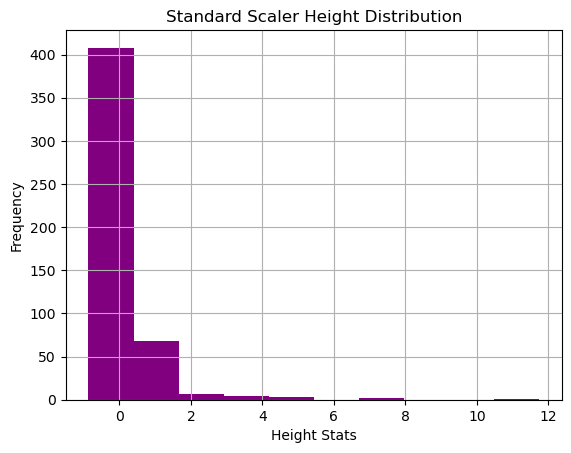

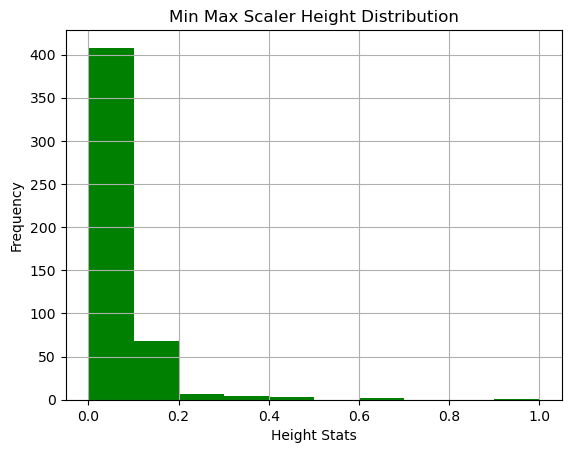

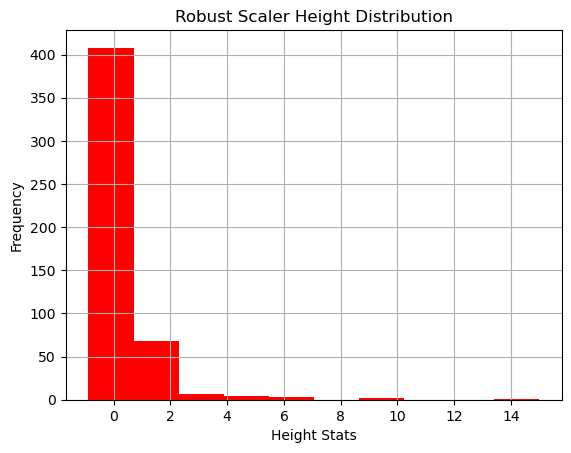

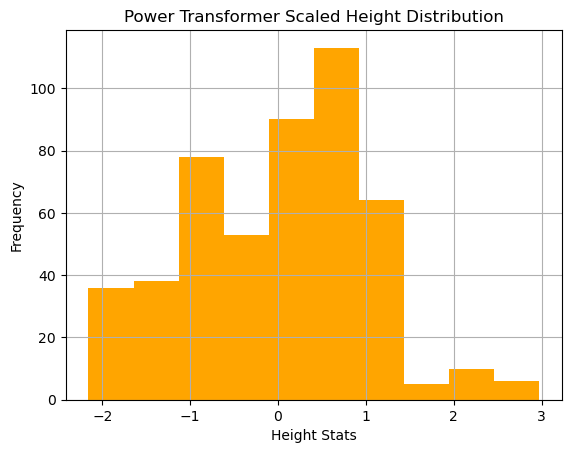

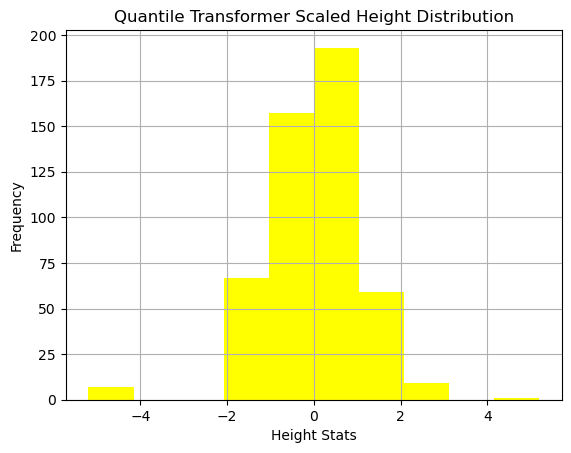

In [59]:
pokemon['height_m'].hist()
plt.xlabel('Height Stats')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.show()

pokemon['s_height_m'].hist(color='purple')
plt.xlabel('Height Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Height Distribution')
plt.show()

pokemon['m_height_m'].hist(color='green')
plt.xlabel('Height Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Height Distribution')
plt.show()

pokemon['r_height_m'].hist(color='red')
plt.xlabel('Height Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaler Height Distribution')
plt.show()

pokemon['p_height_m'].hist(color='orange')
plt.xlabel('Height Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Height Distribution')
plt.show()

pokemon['q_height_m'].hist(color='yellow')
plt.xlabel('Height Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled Height Distribution')
plt.show()
#robust first, then power transformer

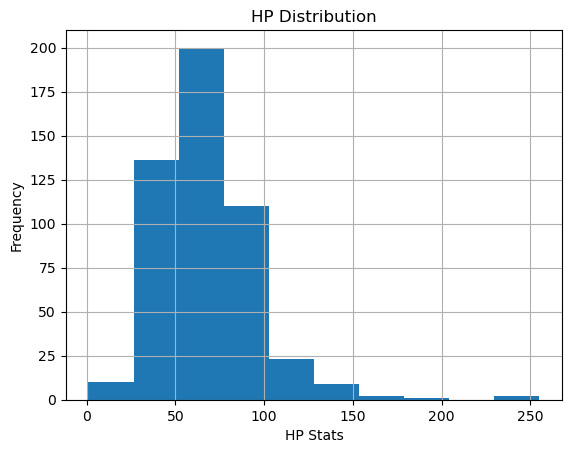

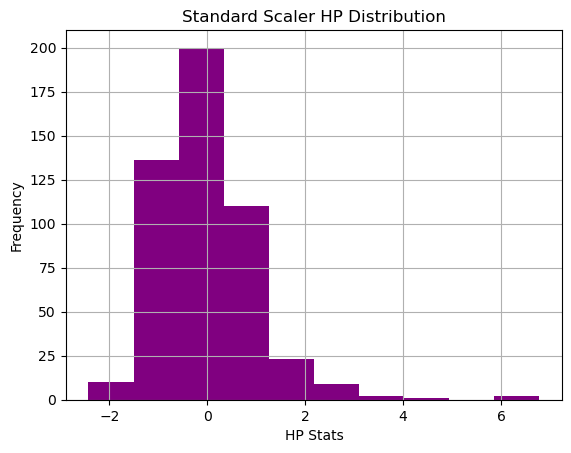

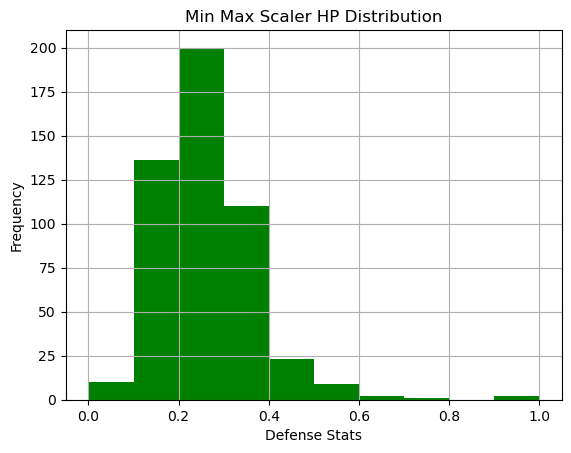

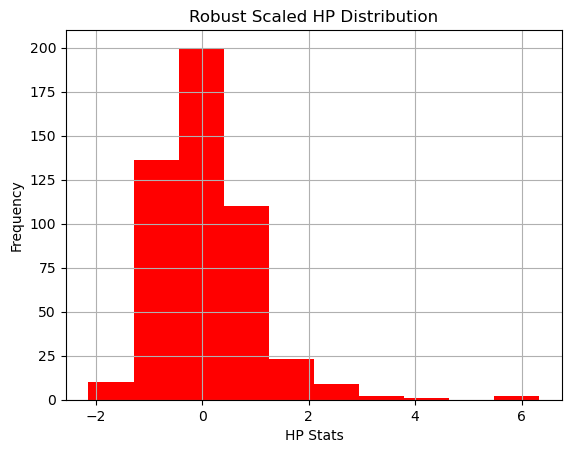

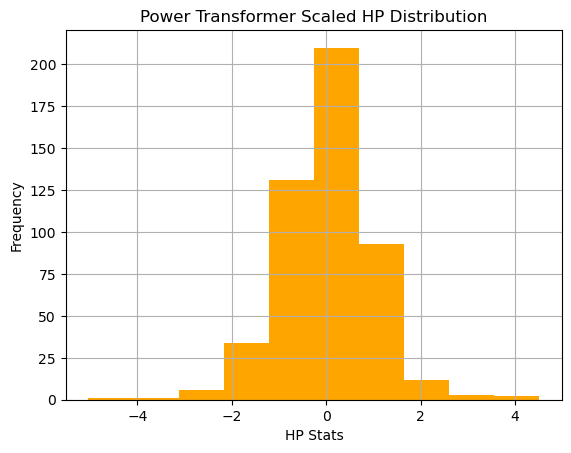

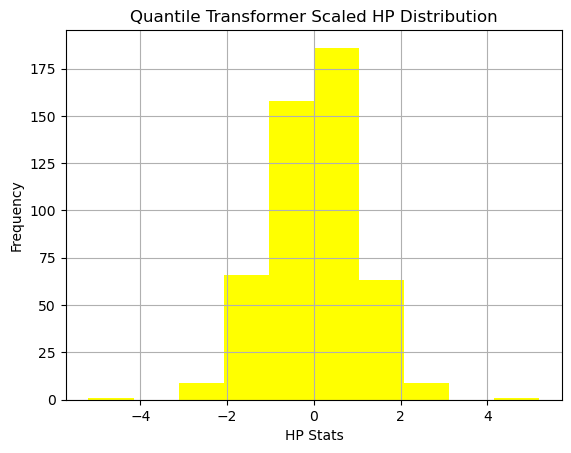

In [60]:
pokemon['hp'].hist()
plt.xlabel('HP Stats')
plt.ylabel('Frequency')
plt.title('HP Distribution')
plt.show()

pokemon['s_hp'].hist(color='purple')
plt.xlabel('HP Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler HP Distribution')
plt.show()

pokemon['m_hp'].hist(color='green')
plt.xlabel('Defense Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler HP Distribution')
plt.show()

pokemon['r_hp'].hist(color='red')
plt.xlabel('HP Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled HP Distribution')
plt.show()

pokemon['p_hp'].hist(color='orange')
plt.xlabel('HP Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled HP Distribution')
plt.show()
#I feel like power transformer is definitely good enough

pokemon['q_hp'].hist(color='yellow')
plt.xlabel('HP Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled HP Distribution')
plt.show()
#power transformer

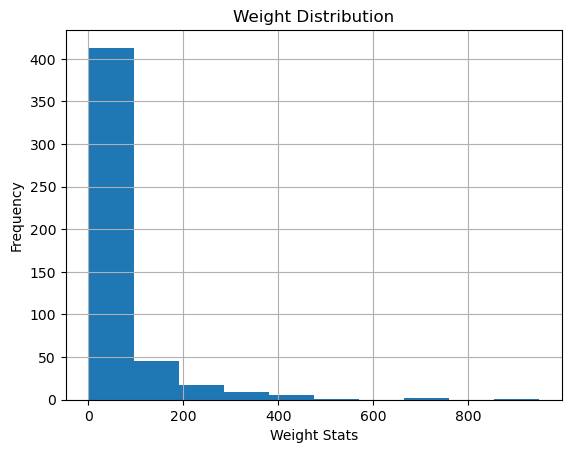

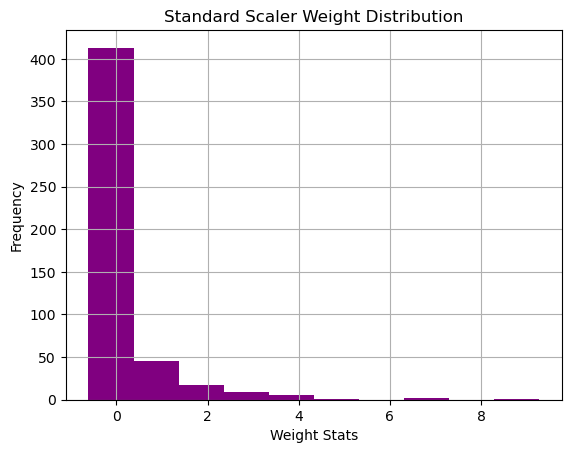

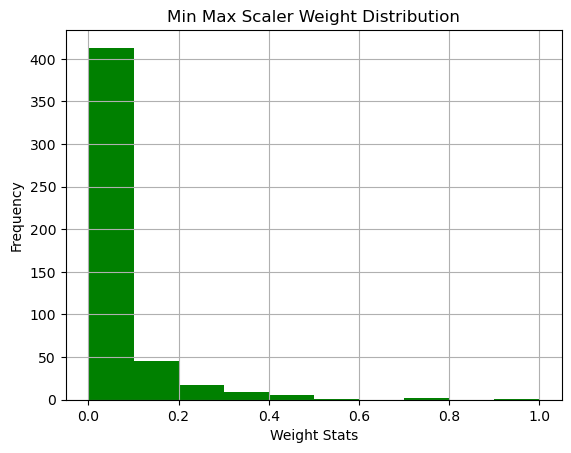

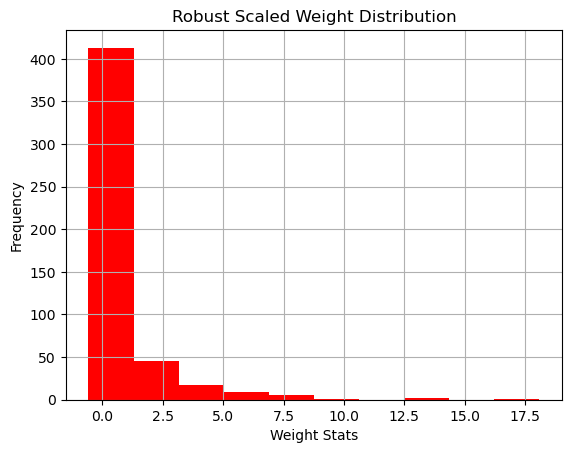

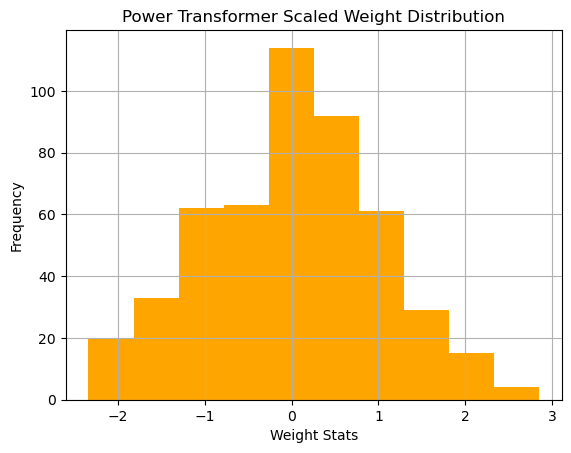

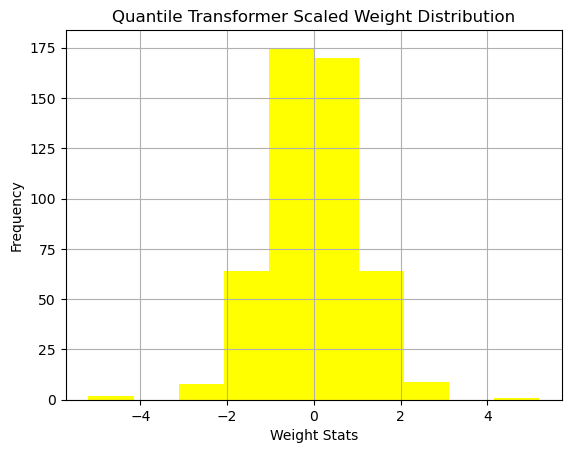

In [61]:
pokemon['weight_kg'].hist()
plt.xlabel('Weight Stats')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.show()

pokemon['s_weight_kg'].hist(color='purple')
plt.xlabel('Weight Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Weight Distribution')
plt.show()

pokemon['m_weight_kg'].hist(color='green')
plt.xlabel('Weight Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Weight Distribution')
plt.show()

pokemon['r_weight_kg'].hist(color='red')
plt.xlabel('Weight Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Weight Distribution')
plt.show()

pokemon['p_weight_kg'].hist(color='orange')
plt.xlabel('Weight Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Weight Distribution')
plt.show()

pokemon['q_weight_kg'].hist(color='yellow')
plt.xlabel('Weight Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled Weight Distribution')
plt.show()

#robust then power transformer

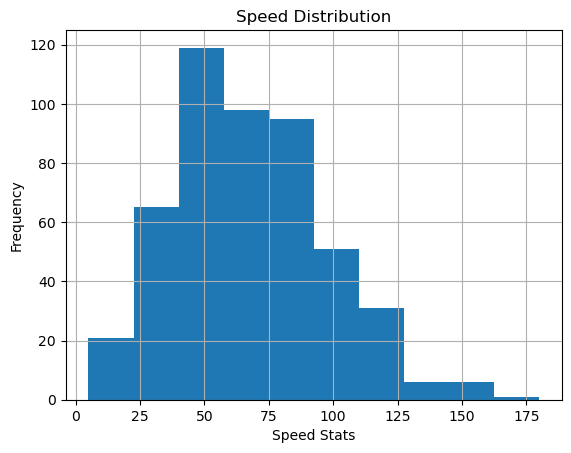

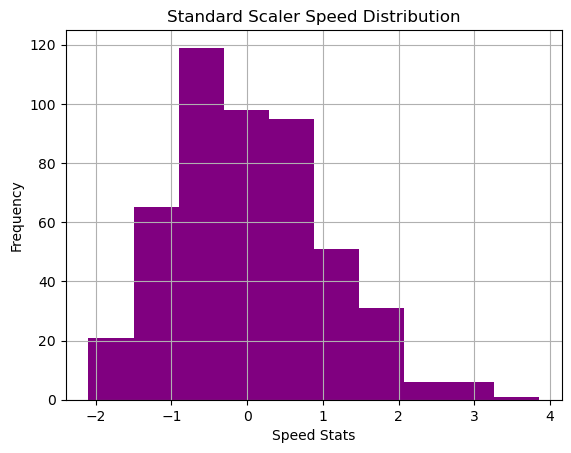

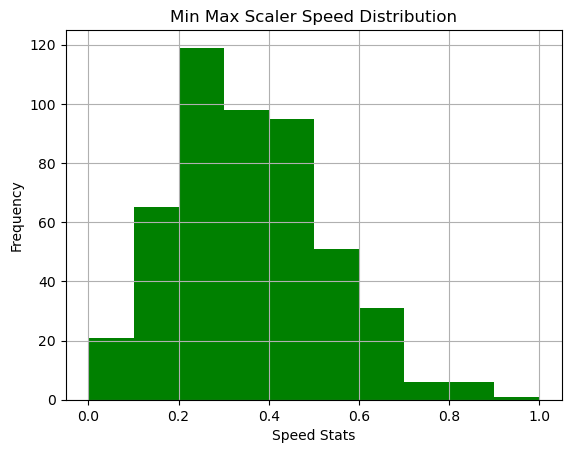

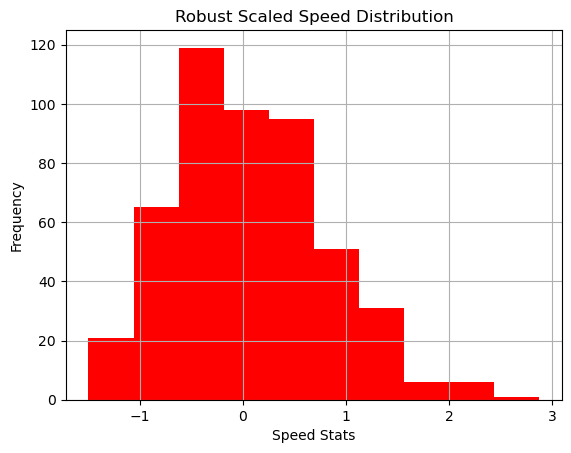

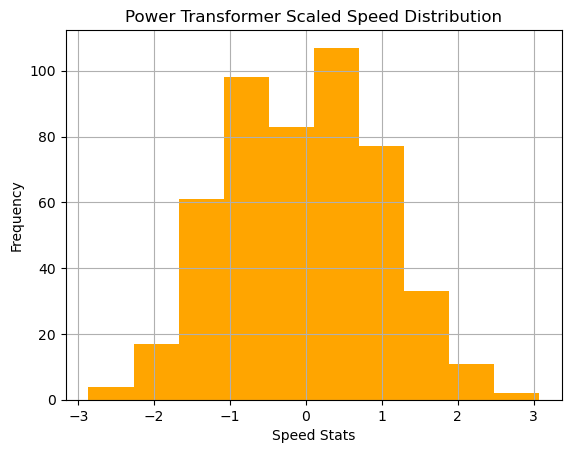

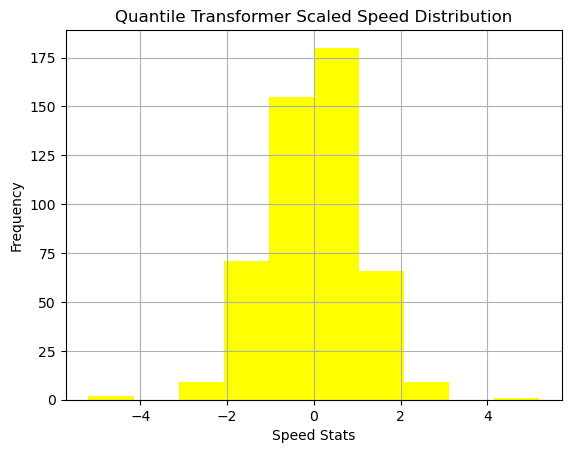

In [62]:
pokemon['speed'].hist()
plt.xlabel('Speed Stats')
plt.ylabel('Frequency')
plt.title('Speed Distribution')
plt.show()

pokemon['s_speed'].hist(color='purple')
plt.xlabel('Speed Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Speed Distribution')
plt.show()

pokemon['m_speed'].hist(color='green')
plt.xlabel('Speed Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Speed Distribution')
plt.show()

pokemon['r_speed'].hist(color='red')
plt.xlabel('Speed Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Speed Distribution')
plt.show()

pokemon['p_speed'].hist(color='orange')
plt.xlabel('Speed Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Speed Distribution')
plt.show()

pokemon['q_speed'].hist(color='yellow')
plt.xlabel('Speed Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled Speed Distribution')
plt.show()
#robust then power

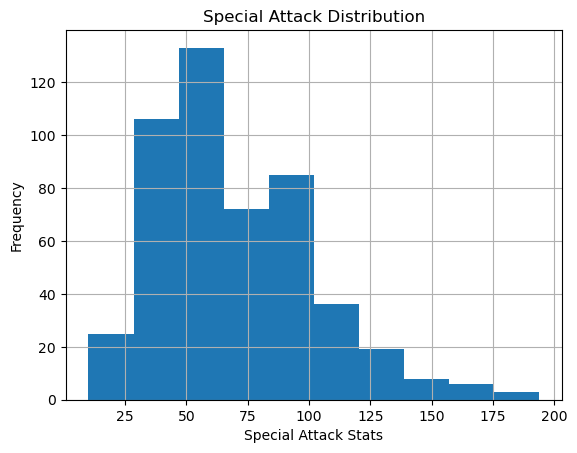

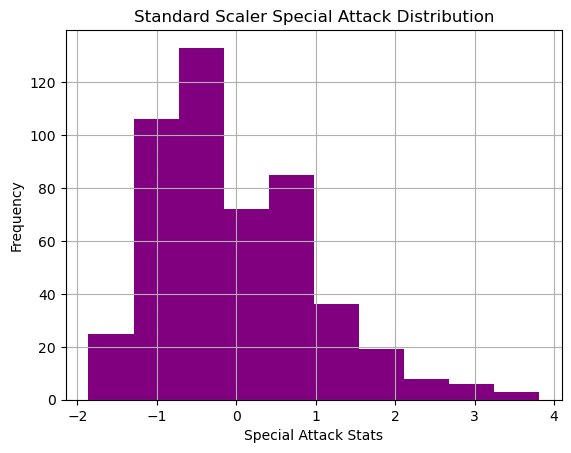

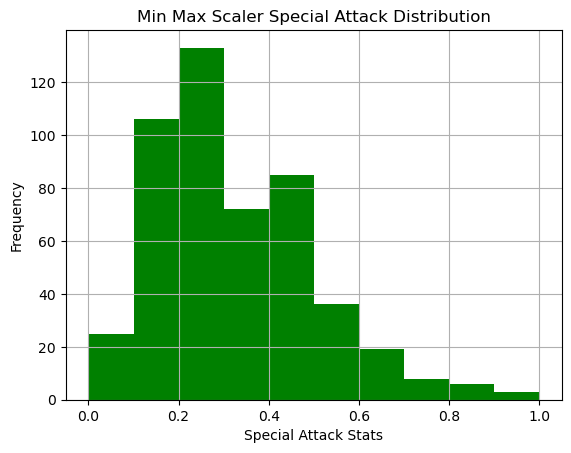

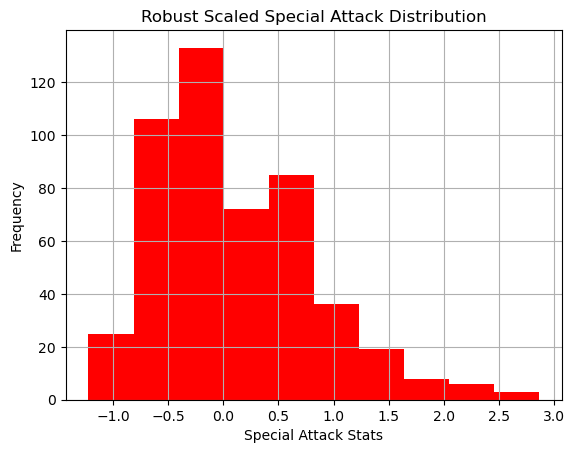

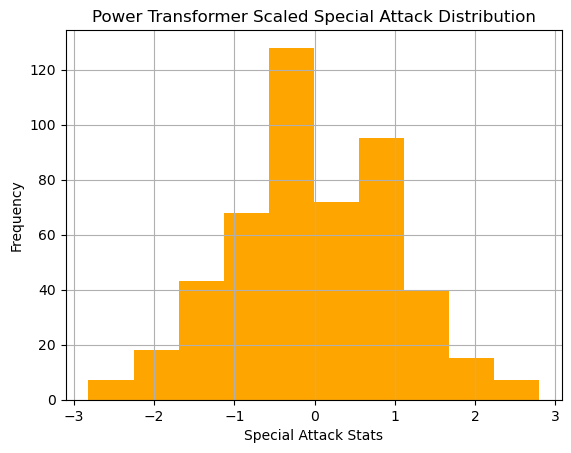

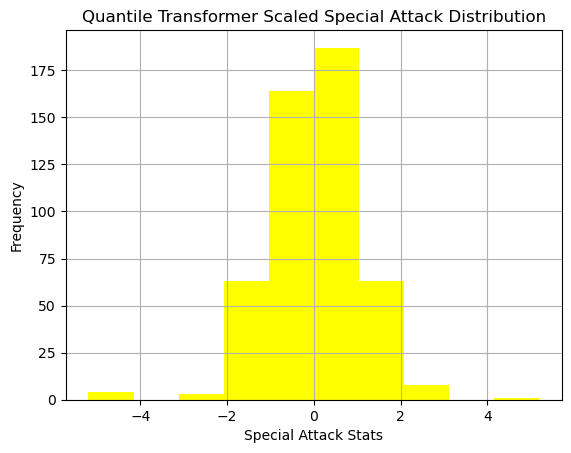

In [63]:
pokemon['sp_attack'].hist()
plt.xlabel('Special Attack Stats')
plt.ylabel('Frequency')
plt.title('Special Attack Distribution')
plt.show()

pokemon['s_sp_attack'].hist(color='purple')
plt.xlabel('Special Attack Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Special Attack Distribution')
plt.show()

pokemon['m_sp_attack'].hist(color='green')
plt.xlabel('Special Attack Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Special Attack Distribution')
plt.show()

pokemon['r_sp_attack'].hist(color='red')
plt.xlabel('Special Attack Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Special Attack Distribution')
plt.show()

pokemon['p_sp_attack'].hist(color='orange')
plt.xlabel('Special Attack Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Special Attack Distribution')
plt.show()

pokemon['q_sp_attack'].hist(color='yellow')
plt.xlabel('Special Attack Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled Special Attack Distribution')
plt.show()

#power transformer

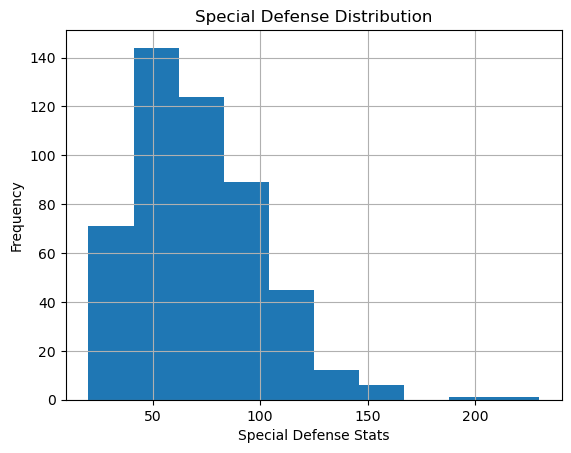

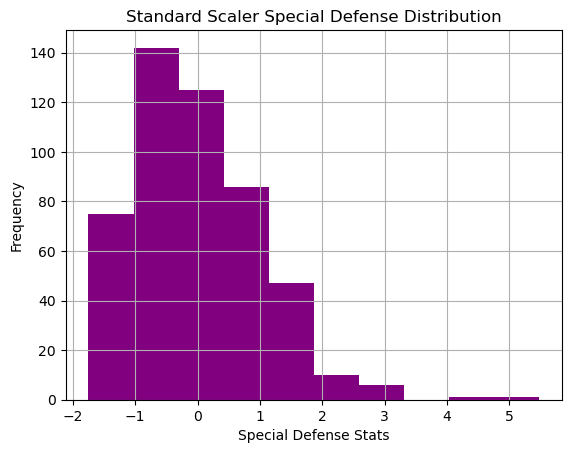

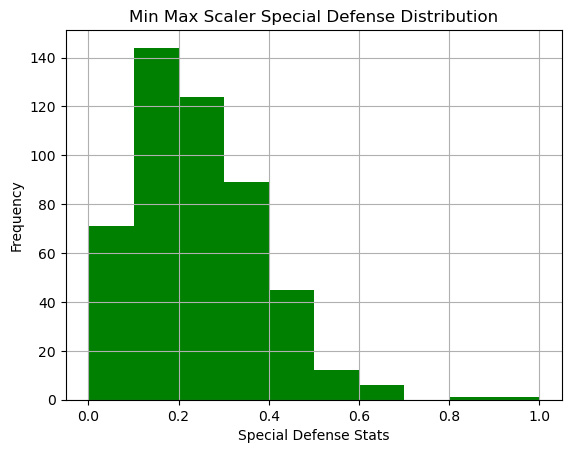

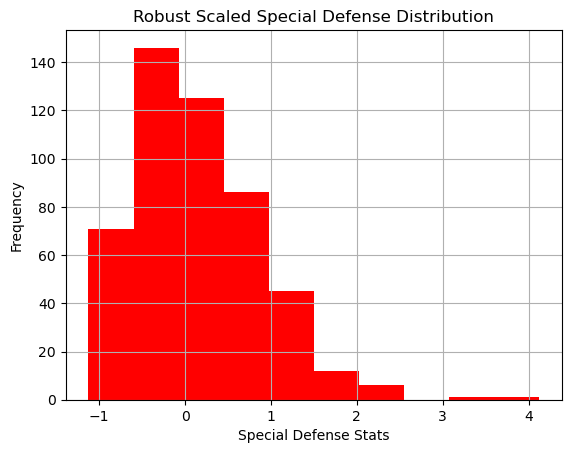

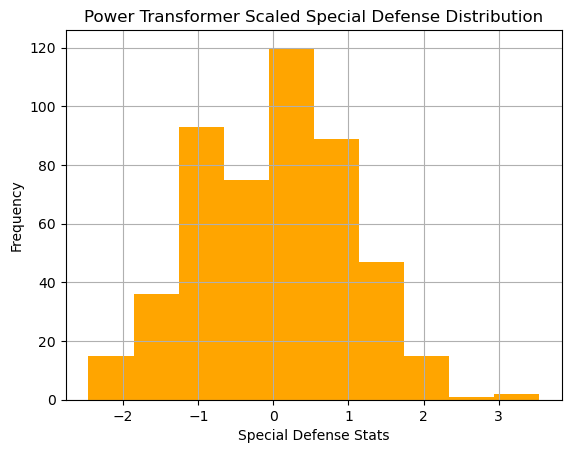

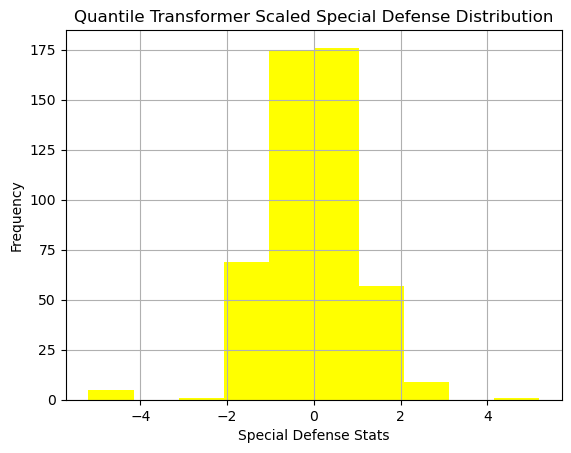

In [64]:
pokemon['sp_defense'].hist()
plt.xlabel('Special Defense Stats')
plt.ylabel('Frequency')
plt.title('Special Defense Distribution')
plt.show()

pokemon['s_sp_defense'].hist(color='purple')
plt.xlabel('Special Defense Stats')
plt.ylabel('Frequency')
plt.title('Standard Scaler Special Defense Distribution')
plt.show()

pokemon['m_sp_defense'].hist(color='green')
plt.xlabel('Special Defense Stats')
plt.ylabel('Frequency')
plt.title('Min Max Scaler Special Defense Distribution')
plt.show()

pokemon['r_sp_defense'].hist(color='red')
plt.xlabel('Special Defense Stats')
plt.ylabel('Frequency')
plt.title('Robust Scaled Special Defense Distribution')
plt.show()

pokemon['p_sp_defense'].hist(color='orange')
plt.xlabel('Special Defense Stats')
plt.ylabel('Frequency')
plt.title('Power Transformer Scaled Special Defense Distribution')
plt.show()

pokemon['q_sp_defense'].hist(color='yellow')
plt.xlabel('Special Defense Stats')
plt.ylabel('Frequency')
plt.title('Quantile Transformer Scaled Special Defense Distribution')
plt.show()
#power transformer

In [65]:
#delete unnecessary columns and reassign names for clarity
#pokemon.columns
#keeping power transformers for all, keep robust for speed(1) and weight(1) and height(1)
pokemon = pokemon.drop(['s_attack', 's_defense', 's_base_total', 's_height_m', 's_hp', 's_weight_kg', 's_speed', 's_sp_attack', 's_sp_defense'],axis=1)
pokemon = pokemon.drop(['m_attack', 'm_defense', 'm_base_total','m_height_m', 'm_hp','m_weight_kg', 'm_speed', 'm_sp_attack', 'm_sp_defense'],axis=1)
pokemon = pokemon.drop(['r_attack', 'r_defense', 'r_base_total', 'r_hp', 'r_sp_attack', 'r_sp_defense'],axis=1)
pokemon = pokemon.drop(['q_base_total','q_height_m', 'q_hp', 'q_weight_kg', 'q_speed', 'q_sp_attack', 'q_sp_defense'],axis=1)
pokemon = pokemon.drop(['attack','defense','height_m','hp','base_total','sp_attack','sp_defense','speed', 'weight_kg'],axis=1)

pokemon.rename(columns={'r_height_m': 'height', 'r_weight_kg': 'weight', 'r_speed':'speed', 'p_attack':'attack', 'p_defense':'defense', 'p_base_total': 'base_total', 'p_hp':'hp', 'p_sp_attack':'sp_attack', 'p_sp_defense':'sp_defense'}, inplace=True)

pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'capture_rate', 'name',
       'pokedex_number', 'type1', 'type2', 'is_legendary', 'typing', 'height',
       'weight', 'speed', 'attack', 'defense', 'base_total', 'p_height_m',
       'hp', 'p_weight_kg', 'p_speed', 'sp_attack', 'sp_defense'],
      dtype='object')

# Visualizing Std Devs for 2 Example Trainer Classes

In [66]:
#calculate the overall standard deviation for a given CLASS
def calculate_class_stat_std(trainer_class, df):
    l = class_dict[trainer_class]
    team_stat_stds = []
    
    for t in range(len(l)):
        team_stat_stds.append(calculate_team_stat_std(l[t], df))
    return team_stat_stds

In [67]:
#calculate the overall standard deviation for a given TEAM
def calculate_team_stat_std(team, poke_cols):
    stat_vals = []
    for pokemon_name in team:
        stat_vals.append(poke_cols[pokemon_name])
    return np.std(stat_vals)

In [68]:
#https://stackoverflow.com/questions/33094056/is-it-possible-to-append-series-to-rows-of-dataframe-without-making-a-list-first

#creates a dataframe with columns labeled by name and a singular row containing series of given statistic
def make_pd(series):
    df = pd.DataFrame(columns=name.values.tolist())
    df.loc[len(df)] = series
    return df

# getting the individual columns for statistics for future usage of making a data frame for each
name = pokemon['name']

atk = pokemon['attack']
atk.index = name.values.tolist()

defense = pokemon['defense']
defense.index = name.values.tolist()

base_tot = pokemon['base_total']
base_tot.index = name.values.tolist()

height = pokemon['height']
height.index = name.values.tolist()

hp = pokemon['hp']
hp.index = name.values.tolist()

weight = pokemon['weight']
weight.index = name.values.tolist()

speed = pokemon['speed']
speed.index = name.values.tolist()

sp_atk = pokemon['sp_attack']
sp_atk.index = name.values.tolist()

sp_def = pokemon['sp_defense']
sp_def.index = name.values.tolist()


#make the concatenated data frames
def_pd = make_pd(defense)
atk_pd = make_pd(atk)
bt_pd = make_pd(base_tot)
wt_pd = make_pd(weight)
speed_pd = make_pd(speed)
sp_atk_pd = make_pd(sp_atk)
sp_def_pd = make_pd(sp_def)

# Calculating Standard Deviations of all Teams for Biker and Fisherman classes

In [69]:
#BIKER Standard Deviation of Stats calculations

#DEFENSE
#and now store the standard deviations for the different stats for plotting to see possible significance
biker_def_std = calculate_class_stat_std('biker', def_pd)
biker_mean_std_def = np.mean(np.array(biker_def_std))


#ATTACK
biker_atk_std = calculate_class_stat_std('biker', atk_pd)
biker_mean_std_atk = np.mean(np.array(biker_atk_std))


#BASE TOTAL
biker_bt_std = calculate_class_stat_std('biker', bt_pd)
biker_mean_std_bt = np.mean(np.array(biker_bt_std))


#WEIGHT
biker_wt_std = calculate_class_stat_std('biker', wt_pd)
biker_mean_std_wt = np.mean(np.array(biker_wt_std))

#SPEED
biker_speed_std = calculate_class_stat_std('biker', speed_pd)
biker_mean_std_speed = np.mean(np.array(biker_speed_std))


#SP. ATTACK
biker_sp_atk_std = calculate_class_stat_std('biker', sp_atk_pd)
biker_mean_std_sp_atk = np.mean(np.array(biker_sp_atk_std))


#SP. DEFENSE
biker_sp_def_std = calculate_class_stat_std('biker', sp_def_pd)
biker_mean_std_sp_def = np.mean(np.array(biker_sp_def_std))

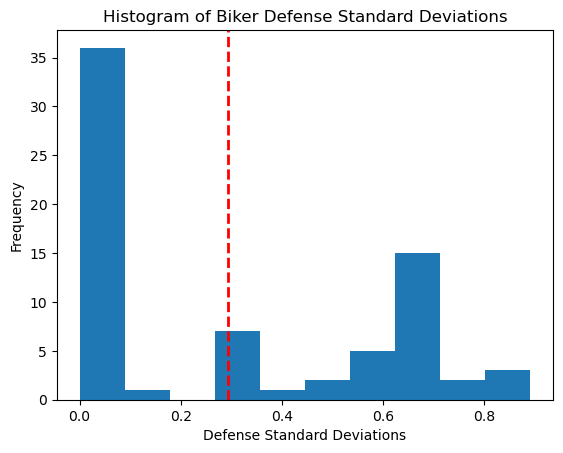

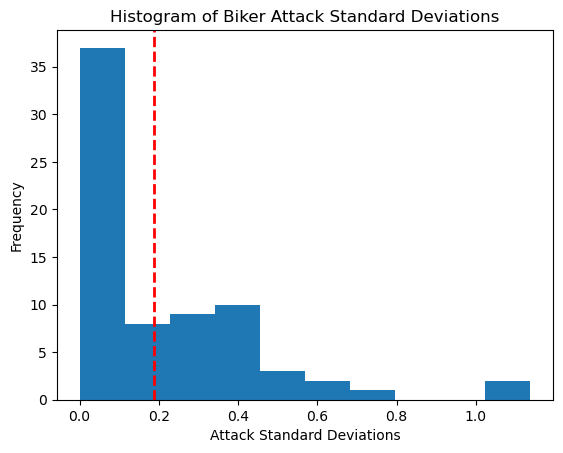

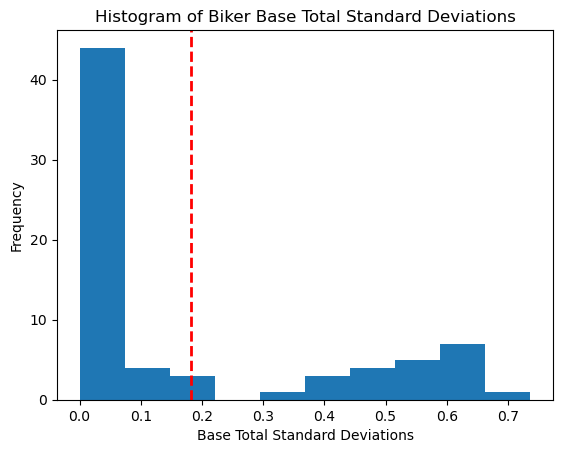

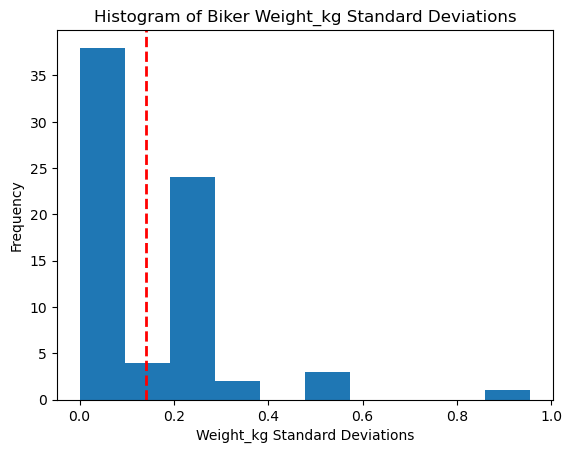

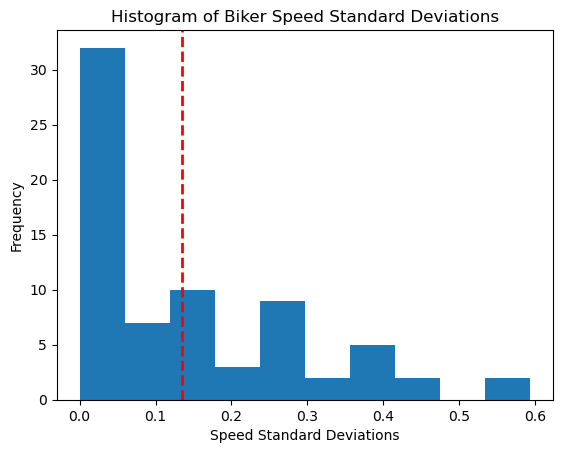

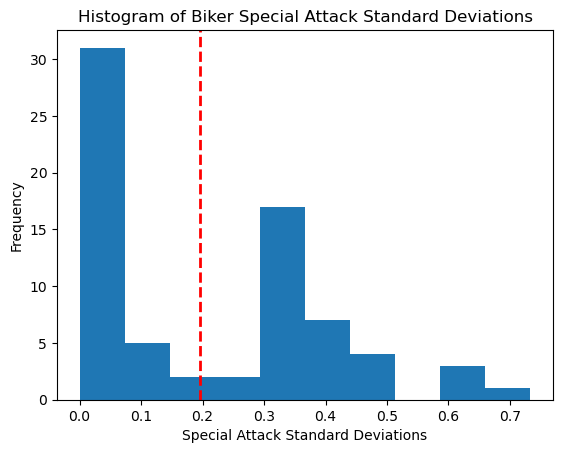

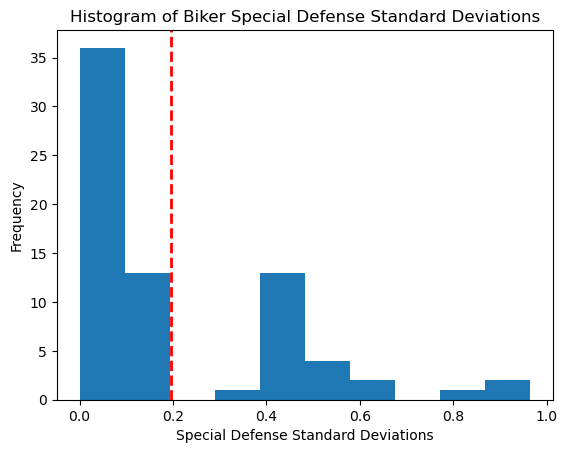

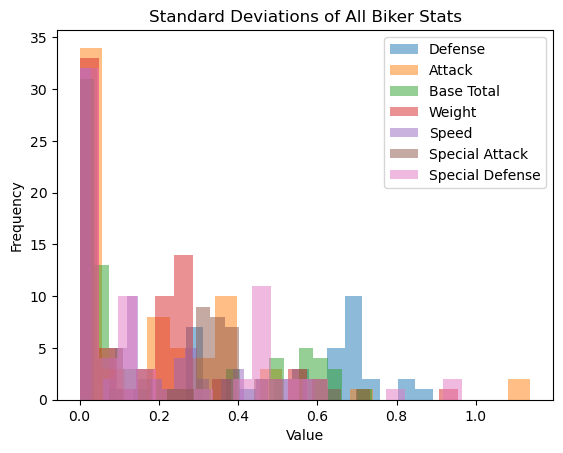

In [70]:
#BIKER std devs

#DEFENSE
fig, ax = plt.subplots()
ax.hist(biker_def_std, bins=10)
ax.axvline(biker_mean_std_def, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Defense Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Defense Standard Deviations')
plt.show()
#there are 35 instances where the standard deviation is between 0-3, the mean std is around 11
#but there's also a lot of instances where the standard deviation is even bigger...


#ATTACK
fig, ax = plt.subplots()
ax.hist(biker_atk_std, bins=10)
ax.axvline(biker_mean_std_atk, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Attack Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Attack Standard Deviations')
plt.show()
#atk seems to be a bit better than defense, more aroud 0-10 with some values past 10 which pulls mean std. dev


#BASE TOTAL
fig, ax = plt.subplots()
ax.hist(biker_bt_std, bins=10)
ax.axvline(biker_mean_std_bt, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Base Total Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Base Total Standard Deviations')
plt.show()
#seems like base totals average around 20 for standard deviations, definitely less skewed, less spread



#WEIGHT
fig, ax = plt.subplots()
ax.hist(biker_wt_std, bins=10)
ax.axvline(biker_mean_std_wt, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Weight_kg Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Weight_kg Standard Deviations')
plt.show()
#weights have two peaks, around 0-3 and 10-13 with the mean std in between those. still a large amount of spread


#SPEED
fig, ax = plt.subplots()
ax.hist(biker_speed_std, bins=10)
ax.axvline(biker_mean_std_speed, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Speed Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Speed Standard Deviations')
plt.show()
#less spread which is good, definitely less spread out than every other stat so far


#SPECIAL ATTACK
fig, ax = plt.subplots()
ax.hist(biker_sp_atk_std, bins=10)
ax.axvline(biker_mean_std_sp_atk, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Special Attack Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Special Attack Standard Deviations')
plt.show()
#definitely more spread out


#SPECIAL DEFENSE
fig, ax = plt.subplots()
ax.hist(biker_sp_def_std, bins=10)
ax.axvline(biker_mean_std_sp_def, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Special Defense Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Biker Special Defense Standard Deviations')
plt.show()
#a bit spread out, but vast majority of distribution lies between 0-3

fig, ax = plt.subplots()
ax.hist(biker_def_std, bins=20, alpha=0.5, label='Defense')
ax.hist(biker_atk_std, bins=20, alpha=0.5, label='Attack')
ax.hist(biker_bt_std, bins=20, alpha=0.5, label='Base Total')
ax.hist(biker_wt_std, bins=20, alpha=0.5, label='Weight')
ax.hist(biker_speed_std, bins=20, alpha=0.5, label='Speed')
ax.hist(biker_sp_atk_std, bins=20, alpha=0.5, label='Special Attack')
ax.hist(biker_sp_def_std, bins=20, alpha=0.5, label='Special Defense')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Standard Deviations of All Biker Stats')
ax.legend()

# Display plot
plt.show()


In [71]:
#FISHERMAN std devs

#DEFENSE
fisherman_def_std = calculate_class_stat_std('fisherman', def_pd)
fisherman_mean_std_def = np.mean(np.array(fisherman_def_std))


#ATTACK
fisherman_atk_std = calculate_class_stat_std('fisherman', atk_pd)
fisherman_mean_std_atk = np.mean(np.array(fisherman_atk_std))


#BASE TOTAL
fisherman_bt_std = calculate_class_stat_std('fisherman', bt_pd)
fisherman_mean_std_bt = np.mean(np.array(fisherman_bt_std))


#WEIGHT
fisherman_wt_std = calculate_class_stat_std('fisherman', wt_pd)
fisherman_mean_std_wt = np.mean(np.array(fisherman_wt_std))

#SPEED
fisherman_speed_std = calculate_class_stat_std('fisherman', speed_pd)
fisherman_mean_std_speed = np.mean(np.array(fisherman_speed_std))


#SP. ATTACK
fisherman_sp_atk_std = calculate_class_stat_std('fisherman', sp_atk_pd)
fisherman_mean_std_sp_atk = np.mean(np.array(fisherman_sp_atk_std))


#SP. DEFENSE
fisherman_sp_def_std = calculate_class_stat_std('fisherman', sp_def_pd)
fisherman_mean_std_sp_def = np.mean(np.array(fisherman_sp_def_std))

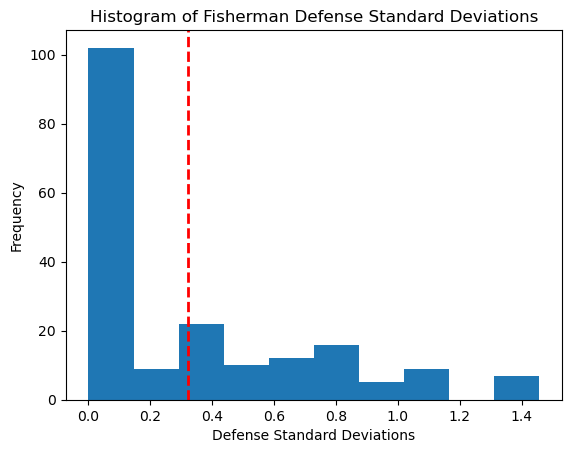

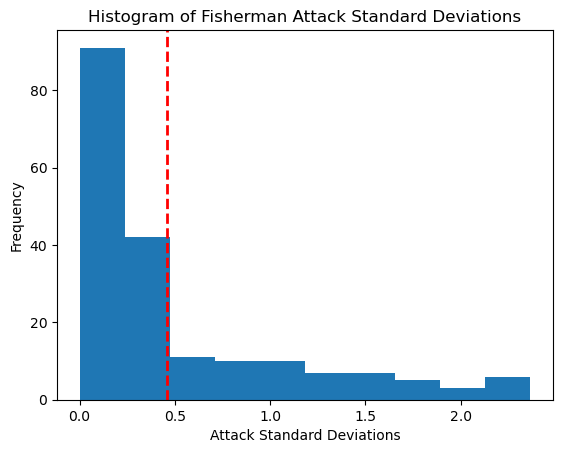

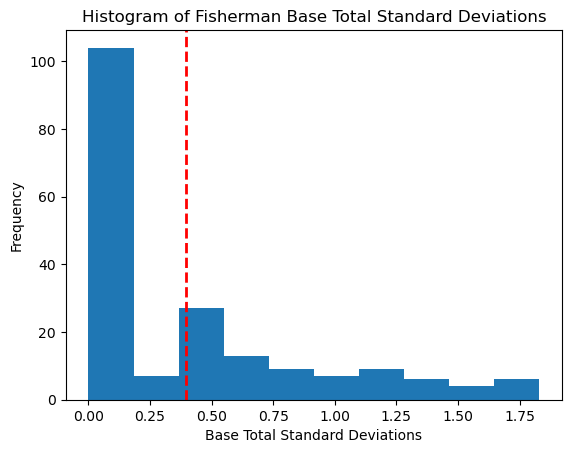

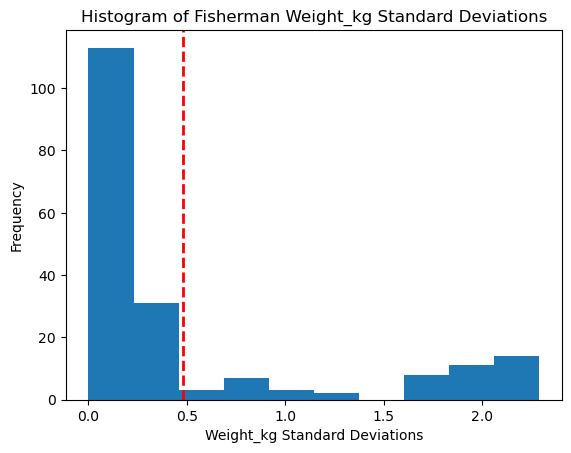

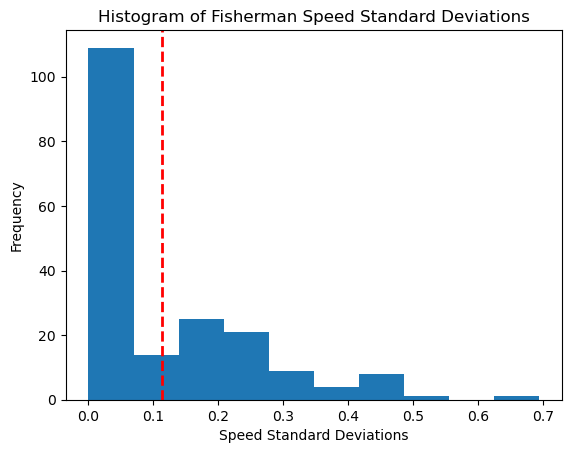

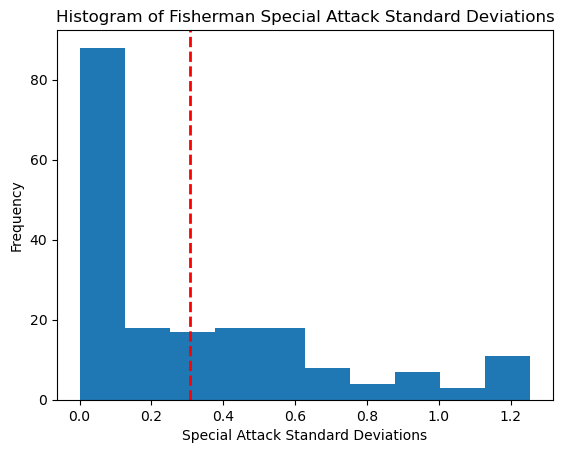

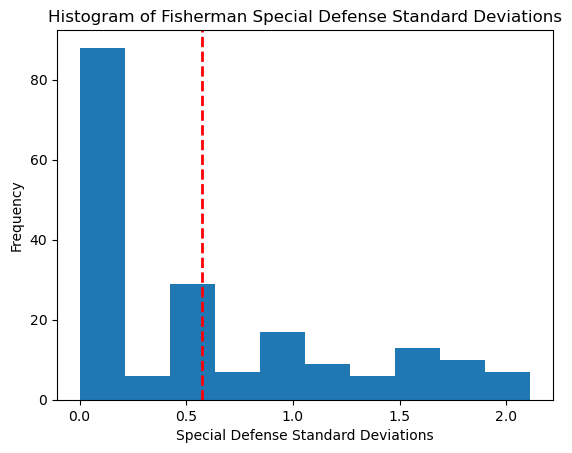

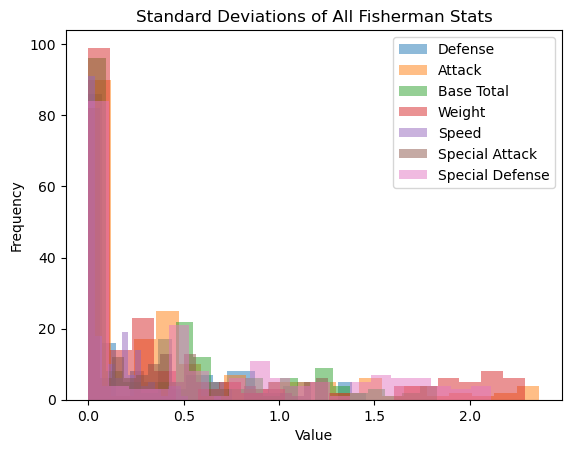

In [72]:
#FISHERMAN std devs

#DEFENSE
fig, ax = plt.subplots()
ax.hist(fisherman_def_std, bins=10)
ax.axvline(fisherman_mean_std_def, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Defense Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Defense Standard Deviations')
plt.show()


#ATTACK
fig, ax = plt.subplots()
ax.hist(fisherman_atk_std, bins=10)
ax.axvline(fisherman_mean_std_atk, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Attack Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Attack Standard Deviations')
plt.show()


#BASE TOTAL
fig, ax = plt.subplots()
ax.hist(fisherman_bt_std, bins=10)
ax.axvline(fisherman_mean_std_bt, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Base Total Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Base Total Standard Deviations')
plt.show()



#WEIGHT
fig, ax = plt.subplots()
ax.hist(fisherman_wt_std, bins=10)
ax.axvline(fisherman_mean_std_wt, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Weight_kg Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Weight_kg Standard Deviations')
plt.show()



#SPEED
fig, ax = plt.subplots()
ax.hist(fisherman_speed_std, bins=10)
ax.axvline(fisherman_mean_std_speed, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Speed Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Speed Standard Deviations')
plt.show()



#SPECIAL ATTACK
fig, ax = plt.subplots()
ax.hist(fisherman_sp_atk_std, bins=10)
ax.axvline(fisherman_mean_std_sp_atk, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Special Attack Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Special Attack Standard Deviations')
plt.show()



#SPECIAL DEFENSE
fig, ax = plt.subplots()
ax.hist(fisherman_sp_def_std, bins=10)
ax.axvline(fisherman_mean_std_sp_def, color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Special Defense Standard Deviations')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fisherman Special Defense Standard Deviations')
plt.show()
#a bit spread out, but vast majority of distribution lies between 0-3

fig, ax = plt.subplots()
ax.hist(fisherman_def_std, bins=20, alpha=0.5, label='Defense')
ax.hist(fisherman_atk_std, bins=20, alpha=0.5, label='Attack')
ax.hist(fisherman_bt_std, bins=20, alpha=0.5, label='Base Total')
ax.hist(fisherman_wt_std, bins=20, alpha=0.5, label='Weight')
ax.hist(fisherman_speed_std, bins=20, alpha=0.5, label='Speed')
ax.hist(fisherman_sp_atk_std, bins=20, alpha=0.5, label='Special Attack')
ax.hist(fisherman_sp_def_std, bins=20, alpha=0.5, label='Special Defense')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Standard Deviations of All Fisherman Stats')
ax.legend()

# Display plot
plt.show()

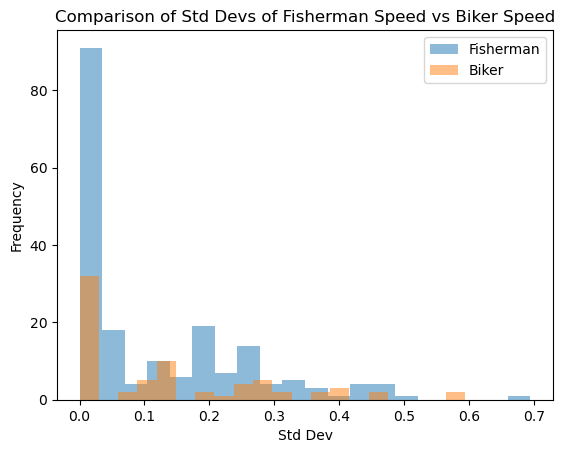

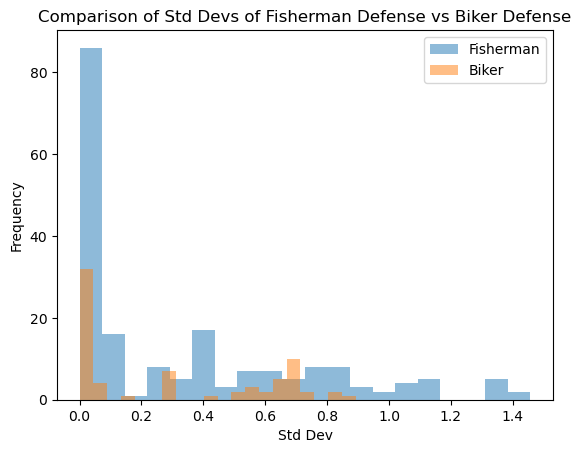

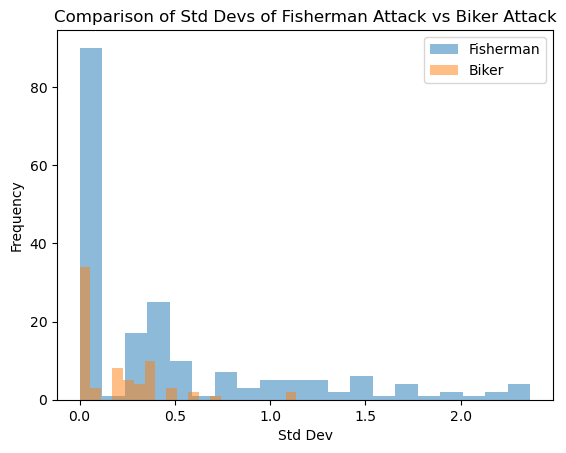

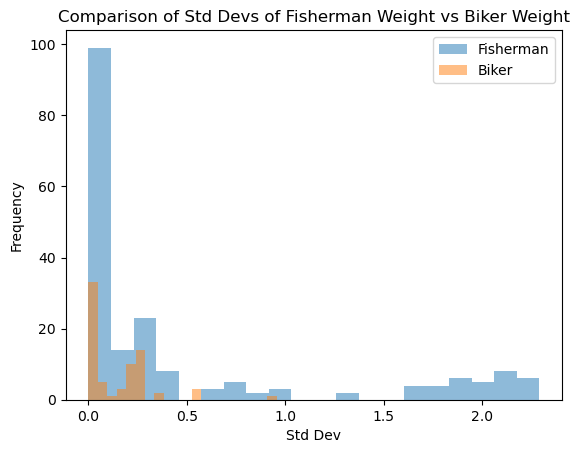

In [73]:
#plot fisherman and biker stats to see differences/similarities
fig, ax = plt.subplots()
ax.hist(fisherman_speed_std, bins=20, alpha=0.5, label='Fisherman')
ax.hist(biker_speed_std, bins=20, alpha=0.5, label='Biker')
ax.set_xlabel('Std Dev')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Std Devs of Fisherman Speed vs Biker Speed')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(fisherman_def_std, bins=20, alpha=0.5, label='Fisherman')
ax.hist(biker_def_std, bins=20, alpha=0.5, label='Biker')
ax.set_xlabel('Std Dev')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Std Devs of Fisherman Defense vs Biker Defense')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(fisherman_atk_std, bins=20, alpha=0.5, label='Fisherman')
ax.hist(biker_atk_std, bins=20, alpha=0.5, label='Biker')
ax.set_xlabel('Std Dev')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Std Devs of Fisherman Attack vs Biker Attack')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(fisherman_wt_std, bins=20, alpha=0.5, label='Fisherman')
ax.hist(biker_wt_std, bins=20, alpha=0.5, label='Biker')
ax.set_xlabel('Std Dev')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Std Devs of Fisherman Weight vs Biker Weight')
ax.legend()
plt.show()

# Vectorizing Data

In [74]:
#get the primary and secondary typing and return the type
poke_typing = pokemon.loc[:,['name','type1','type2']]
poke_typing.head()

,name,type1,type2
0,bulbasaur,grass,poison
1,ivysaur,grass,poison
2,venusaur,grass,poison
3,charmander,fire,NaN
4,charmeleon,fire,NaN


In [75]:
# does something similar to create_type_dictionary function, except looks at the types separately
def get_typings_index(name):
    if len(pokemon.index[poke_typing['name'].str.contains(name)]) != 0:
        # a dictionary that will act as an index for the 18 (because 18 types) elemental vector array
        typing_index_map = {'normal': 0, 'fire': 1, 'water': 2, 'electric': 3, 'grass': 4, 'ice': 5, 
                            'fighting': 6, 'poison': 7, 'ground': 8, 'flying': 9, 'psychic': 10, 'bug': 11,
                            'rock': 12, 'ghost': 13, 'dragon': 14, 'dark': 15, 'steel': 16, 'fairy': 17}

        index = pokemon.index[poke_typing['name'].str.contains(name)]
        type1 = poke_typing.iloc[index[0]][1]
        type2 = poke_typing.iloc[index[0]][2]
        if str(type2)=='nan':
            return typing_index_map[str(type1)], 0
        else:
            return typing_index_map[str(type1)], typing_index_map[str(type2)]
    else:
        #fail safe in case of possibly misspelling on our end
        return 0

In [76]:
#slice out pokemon stats by name to make it easier to access the stats
poke_stats = pokemon.loc[:,['name', 'attack','defense','height','hp','base_total','sp_attack','sp_defense','speed', 'weight']]
poke_stats.head()

,name,attack,defense,height,hp,base_total,sp_attack,sp_defense,speed,weight
0,bulbasaur,-0.790171,-0.669108,-0.333333,-0.858493,-0.839413,-0.021550,-0.059554,-0.500,-0.444008
1,ivysaur,-0.343299,-0.158235,0.000000,-0.190482,-0.089451,0.430398,0.451588,-0.125,-0.324165
2,venusaur,0.769997,1.442796,1.111111,0.554314,1.534937,1.463799,1.536475,0.375,1.385069
3,charmander,-0.682888,-0.917224,-0.444444,-1.164488,-0.921968,-0.186616,-0.665250,0.000,-0.412574
4,charmeleon,-0.278315,-0.331353,0.111111,-0.273044,-0.089451,0.430398,-0.059554,0.375,-0.206287


In [77]:
#returns a dictionary of stats given a pokemon name as input using poke_stats data frame above
def get_poke_data(name):
    if len(pokemon.index[poke_stats['name'].str.contains(name)]) != 0:
        index = pokemon.index[poke_stats['name'].str.contains(name)]
        poke_data = {}
        poke_data['attack'] = poke_stats.iloc[index[0]][1]
        poke_data['defense'] = poke_stats.iloc[index[0]][2]
        poke_data['height'] = poke_stats.iloc[index[0]][3]
        poke_data['hp'] = poke_stats.iloc[index[0]][4]
        poke_data['base_total'] = poke_stats.iloc[index[0]][5]
        poke_data['sp_atk'] = poke_stats.iloc[index[0]][6]
        poke_data['sp_def'] = poke_stats.iloc[index[0]][7]
        poke_data['speed'] = poke_stats.iloc[index[0]][8]
        poke_data['weight'] = poke_stats.iloc[index[0]][9]
        return poke_data
    else: #fail safe
        return dict({'attack':0, 'defense':0, 'height':0, 'hp':0, 'base_total':0, 'sp_atk':0, 'sp_def':0, 'speed':0, 'weight':0})

In [78]:
#returns the elemental representation of a team and the standard deviations of statistics
def team_vectorize(team):
    team_vector = []
    team_speed = []
    team_height = []
    team_defense = []
    team_attack = []
    team_special_defense = []
    team_weight = []
    team_special_attack = []
    team_hp = []
    team_base_total = []

    for pokemon_name in team:
        poke_element = np.zeros(18)
        if pd.isnull(pokemon_name):
            continue
            
        pokemon_data = get_poke_data(pokemon_name)

        # Create one-hot encoding vector for the types of the pokemon
        primary_type_index, secondary_type_index = get_typings_index(pokemon_name)

        # fill in types matrix with one-hot encoding
        poke_element[primary_type_index] = 1
        if secondary_type_index != 0:
            poke_element[secondary_type_index] = 1
            
        #append individual pokemon's element to team one-hot encoded vector
        team_vector.append(poke_element)
        
        # Collect statistics for each pokemon on the team
        team_speed.append(pokemon_data['speed'])
        team_attack.append(pokemon_data['attack'])
        team_weight.append(pokemon_data['weight'])
        team_special_attack.append(pokemon_data['sp_atk'])
        team_height.append(pokemon_data['height'])
        team_defense.append(pokemon_data['defense'])
        team_special_defense.append(pokemon_data['sp_def'])
        team_hp.append(pokemon_data['hp'])
        team_base_total.append(pokemon_data['base_total'])
    # Calculate standard deviation for team statistics
    team_stats = [np.std(team_speed), np.std(team_attack), np.std(team_weight), 
                   np.std(team_special_attack), np.std(team_height), np.std(team_defense),
                   np.std(team_special_defense), np.std(team_hp), np.std(team_base_total)]

    return np.array(team_vector,dtype=np.float64), np.array(team_stats)

In [79]:
#introduce new columns to represent categorical data numerically
trainers[['Team Vector', 'Team Statistics']] = trainers.apply(lambda row: pd.Series(team_vectorize(row[1:7])), axis=1)

In [80]:
#trying to see the range of standard deviatons in the data
#https://stackoverflow.com/questions/43191852/what-does-ravel-do-in-pandas-series
flat_stats = []
for i, team in enumerate(trainers['Team Statistics']):
    try:
        flat_stats.extend(team.ravel())
    except KeyError as e:
        print(f"Error occurred at index {i}: {e}")
#we need to preserve the standard deviations before truncating them to int32
flat_stats = np.array(flat_stats)
flat_stats.min() #0
flat_stats.max() #7.0710678118654755

7.0710678118654755

In [81]:
#basically seeing how many instances have only one member in a team or all of the same pokemon
zero_count = len(trainers[trainers['Team Statistics'].apply(lambda x: np.all(x==0))])
print("Number of rows with all 0's in Team Statistics column:", zero_count)

Number of rows with all 0's in Team Statistics column: 1365


In [82]:
# define function to replace 0 values with 0.01 so we can use them in the model still because we were getting errors?
def replace_zeros(arr):
    return np.where(arr == 0, 0.01, arr)

# apply function to column
trainers['Team Statistics'] = trainers['Team Statistics'].apply(replace_zeros)

In [83]:
#just to make sure above function worked

zero_count = len(trainers[trainers['Team Statistics'].apply(lambda x: np.all(x==0))])
print("Number of rows with all 0's in Team Statistics column:", zero_count)

Number of rows with all 0's in Team Statistics column: 0


# Modeling

In [84]:
#https://keras.io/api/layers/core_layers/input/
#https://keras.io/api/layers/recurrent_layers/lstm/
#https://keras.io/api/layers/merge_layers/concatenate/
#https://keras.io/api/layers/core_layers/dense/

train_data, test_data = train_test_split(trainers, test_size=0.2, stratify=trainers['Class'])
class_map = {label: i for i, label in enumerate(train_data['Class'].unique())}

train_vectors = [np.array(x) for x in train_data['Team Vector'].values]
train_vectors_padded = tf.keras.preprocessing.sequence.pad_sequences(train_vectors, padding='post')
train_vectors_padded = train_vectors_padded.astype('float32')
train_stats = np.array([np.array(stat).flatten() for stat in train_data['Team Statistics']], dtype=np.float32)
train_target = tf.keras.utils.to_categorical(train_data['Class'].map(class_map).values, num_classes=len(class_map))

test_vectors = [np.array(x) for x in test_data['Team Vector'].values]
test_vectors_padded = tf.keras.preprocessing.sequence.pad_sequences(test_vectors, padding='post')
test_vectors_padded = test_vectors_padded.astype('float32')
test_stats = np.array([np.array(stat).flatten() for stat in test_data['Team Statistics']], dtype=np.float32)

test_target = tf.keras.utils.to_categorical(test_data['Class'].map(class_map).values, num_classes=len(class_map))

# Define the model
team_vector_input = tf.keras.Input(shape=(None, 18), name='Team Vector')
team_stats_input = tf.keras.Input(shape=(9,), name='Team Statistics')
lstm_output = tf.keras.layers.LSTM(64)(team_vector_input)
concatenated_output = tf.keras.layers.concatenate([lstm_output, team_stats_input])
dense_output = tf.keras.layers.Dense(128, activation='relu')(concatenated_output)
dense_output = tf.keras.layers.Dense(64, activation='relu')(dense_output)
dense_output = tf.keras.layers.Dense(32, activation='relu')(dense_output)
output = tf.keras.layers.Dense(52, activation='softmax', name='Output')(dense_output)

model = tf.keras.Model(inputs=[team_vector_input, team_stats_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([train_vectors_padded, train_stats], train_target, epochs=10, batch_size=32, validation_data=([test_vectors_padded, test_stats], test_target))
for i, loss in enumerate(history.history['loss']):
    print(f'Epoch {i}: loss={loss:.4f}, accuracy={history.history["accuracy"][i]:.4f}')


Epoch 1/10
94/94 [==============================] - 7s 17ms/step - loss: 3.5163 - accuracy: 0.1440 - val_loss: 2.9578 - val_accuracy: 0.2547
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 2.8079 - accuracy: 0.2886 - val_loss: 2.5713 - val_accuracy: 0.3137
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 2.5101 - accuracy: 0.3433 - val_loss: 2.3983 - val_accuracy: 0.3807
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 2.3533 - accuracy: 0.3708 - val_loss: 2.2586 - val_accuracy: 0.3820
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 2.2363 - accuracy: 0.4104 - val_loss: 2.1916 - val_accuracy: 0.4062
Epoch 6/10
94/94 [==============================] - 1s 13ms/step - loss: 2.1312 - accuracy: 0.4225 - val_loss: 2.1158 - val_accuracy: 0.4223
Epoch 7/10
94/94 [==============================] - 1s 11ms/step - loss: 2.0655 - accuracy: 0.4413 - val_loss: 2.0487 - val_accuracy: 0.4397
Epoch 8/10
94/94 

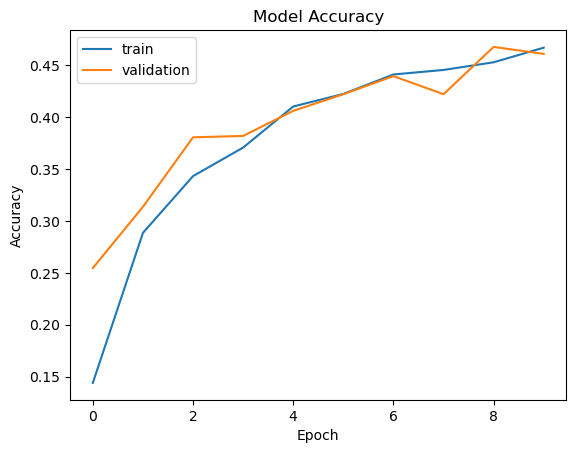

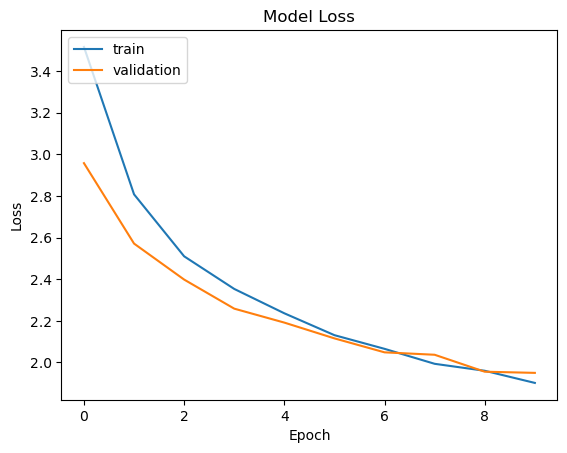

In [85]:
#https://www.tensorflow.org/guide/keras/train_and_evaluate#visualizing_loss_and_accuracy_of_the_model

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [87]:
# Predict the classes for the test set
test_predictions = model.predict([test_vectors_padded, test_stats]).argmax(axis=1)

# Get the true classes for the test set
test_true_classes = test_data['Class'].map(class_map).values

# Generate the classification report
report = classification_report(test_true_classes, test_predictions, zero_division=0)

print(report)


24/24 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.02      0.38      0.05        26
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        29
           3       0.03      0.05      0.04        39
           4       0.00      0.00      0.00        75
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        36
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        62
          15       0.00      0.00      0.00        18
          16       0.00     

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(trainers, test_size=0.2, stratify=trainers['Class'])
class_map = {label: i for i, label in enumerate(train_data['Class'].unique())}

train_vectors = [np.array(x) for x in train_data['Team Vector'].values]
train_vectors_padded = tf.keras.preprocessing.sequence.pad_sequences(train_vectors, padding='post')
train_vectors_padded = train_vectors_padded.astype('float32')
train_stats = np.array([np.array(stat).flatten() for stat in train_data['Team Statistics']], dtype=np.float32)
train_target = tf.keras.utils.to_categorical(train_data['Class'].map(class_map).values, num_classes=len(class_map))

test_vectors = [np.array(x) for x in test_data['Team Vector'].values]
test_vectors_padded = tf.keras.preprocessing.sequence.pad_sequences(test_vectors, padding='post')
test_vectors_padded = test_vectors_padded.astype('float32')
test_stats = np.array([np.array(stat).flatten() for stat in test_data['Team Statistics']], dtype=np.float32)

test_target = tf.keras.utils.to_categorical(test_data['Class'].map(class_map).values, num_classes=len(class_map))

# Define the model
team_vector_input = tf.keras.Input(shape=(None, 18), name='Team Vector')
team_stats_input = tf.keras.Input(shape=(9,), name='Team Statistics')
lstm_output = tf.keras.layers.LSTM(64)(team_vector_input)
concatenated_output = tf.keras.layers.concatenate([lstm_output, team_stats_input])
dense_output = tf.keras.layers.Dense(128, activation='relu')(concatenated_output)
dense_output = tf.keras.layers.Dense(64, activation='relu')(dense_output)
dense_output = tf.keras.layers.Dense(32, activation='relu')(dense_output)
output = tf.keras.layers.Dense(52, activation='softmax', name='Output')(dense_output)

model = tf.keras.Model(inputs=[team_vector_input, team_stats_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([train_vectors_padded, train_stats], train_target, epochs=5, batch_size=32, validation_data=([test_vectors_padded, test_stats], test_target))
for i, loss in enumerate(history.history['loss']):
    print(f'Epoch {i}: loss={loss:.4f}, accuracy={history.history["accuracy"][i]:.4f}')


Epoch 1/5
94/94 [==============================] - 11s 38ms/step - loss: 3.5516 - accuracy: 0.1272 - val_loss: 3.1000 - val_accuracy: 0.2198
Epoch 2/5
94/94 [==============================] - 1s 12ms/step - loss: 2.8864 - accuracy: 0.2651 - val_loss: 2.6666 - val_accuracy: 0.3164
Epoch 3/5
94/94 [==============================] - 1s 9ms/step - loss: 2.5609 - accuracy: 0.3389 - val_loss: 2.4825 - val_accuracy: 0.3445
Epoch 4/5
94/94 [==============================] - 1s 10ms/step - loss: 2.3470 - accuracy: 0.3772 - val_loss: 2.2961 - val_accuracy: 0.3928
Epoch 5/5
94/94 [==============================] - 1s 11ms/step - loss: 2.2122 - accuracy: 0.3956 - val_loss: 2.1989 - val_accuracy: 0.4115
Epoch 0: loss=3.5516, accuracy=0.1272
Epoch 1: loss=2.8864, accuracy=0.2651
Epoch 2: loss=2.5609, accuracy=0.3389
Epoch 3: loss=2.3470, accuracy=0.3772
Epoch 4: loss=2.2122, accuracy=0.3956


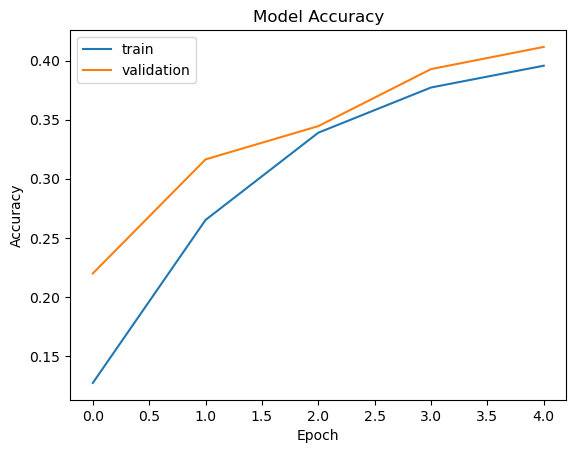

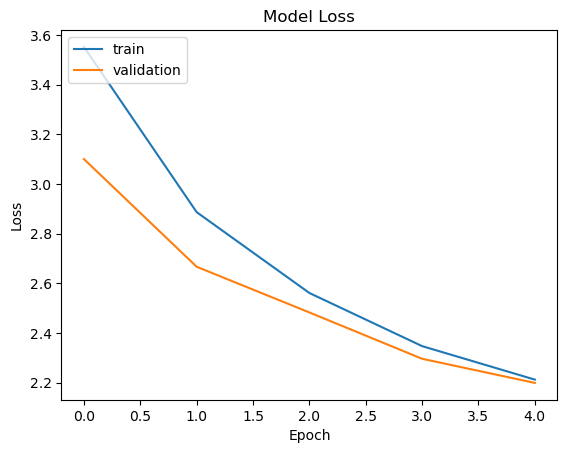

In [30]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [88]:
# Predict the classes for the test set
test_predictions = model.predict([test_vectors_padded, test_stats]).argmax(axis=1)

# Get the true classes for the test set
test_true_classes = test_data['Class'].map(class_map).values

# Generate the classification report
report = classification_report(test_true_classes, test_predictions, zero_division=0)

print(report)


24/24 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.02      0.38      0.05        26
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        29
           3       0.03      0.05      0.04        39
           4       0.00      0.00      0.00        75
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        36
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        62
          15       0.00      0.00      0.00        18
          16       0.00     

# the model we wish worked :')

In [86]:
# this was the original MLP-RNN we wanted to implement, but didn't have enough time to debug it
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
train_data, test_data = train_test_split(trainers, test_size=0.2, stratify=trainers['Class'])
class_map = {label: i for i, label in enumerate(train_data['Class'].unique())}

# Extract the input variables and target variable
train_vectors = [np.array(x) for x in train_data['Team Vector'].values]
train_stats = np.array([np.array(stat).flatten() for stat in train_data['Team Statistics']], dtype=np.float32)
train_target = tf.keras.utils.to_categorical(train_data['Class'].map(class_map).values, num_classes=len(class_map))

test_vectors = [np.array(x) for x in test_data['Team Vector'].values]
test_stats = np.array([np.array(stat).flatten() for stat in test_data['Team Statistics']], dtype=np.float32)
test_target = tf.keras.utils.to_categorical(test_data['Class'].map(class_map).values, num_classes=len(class_map))

# Define the model
team_vector_input = tf.keras.Input(shape=(None, 18), name='Team Vector')
team_stats_input = tf.keras.Input(shape=(9,), name='Team Statistics')
pooled_output = tf.keras.layers.GlobalMaxPooling1D()(team_vector_input)
concatenated_output = tf.keras.layers.concatenate([pooled_output, team_stats_input])
dense_output = tf.keras.layers.Dense(128, activation='relu')(concatenated_output)
dense_output = tf.keras.layers.Dense(64, activation='relu')(dense_output)
dense_output = tf.keras.layers.Dense(32, activation='relu')(dense_output)
output = tf.keras.layers.Dense(52, activation='softmax', name='Output')(dense_output)

model = tf.keras.Model(inputs=[team_vector_input, team_stats_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([train_vectors, train_stats], train_target, epochs=10, batch_size=32, validation_data=([test_vectors, test_stats], test_target))
for i, loss in enumerate(history.history['loss']):
    print(f'Epoch {i}: loss={loss:.4f}, accuracy={history.history["accuracy"][i]:.4f}')


ValueError: Data cardinality is ambiguous:
  x sizes: 3, 2, 1, 3, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 3, 2, 3, 1, 1, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 6, 3, 1, 2, 2, 5, 2, 2, 4, 3, 3, 2, 5, 2, 2, 2, 3, 1, 1, 1, 1, 3, 4, 2, 2, 2, 1, 2, 3, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 5, 1, 1, 2, 4, 4, 4, 2, 3, 3, 2, 4, 1, 4, 3, 1, 1, 2, 4, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4, 3, 2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 2, 4, 4, 1, 2, 2, 4, 3, 3, 2, 3, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 2, 3, 2, 6, 1, 2, 6, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 4, 4, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 4, 1, 3, 2, 3, 2, 1, 3, 4, 2, 4, 2, 3, 3, 2, 3, 2, 2, 1, 3, 3, 2, 4, 1, 3, 1, 2, 5, 3, 2, 1, 1, 2, 1, 3, 3, 4, 3, 5, 2, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 3, 2, 1, 4, 1, 3, 4, 3, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3, 5, 3, 2, 4, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 4, 2, 1, 1, 4, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 1, 2, 1, 4, 2, 3, 2, 3, 2, 2, 1, 1, 1, 1, 3, 3, 2, 2, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 2, 1, 1, 4, 2, 1, 1, 2, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 2, 3, 1, 2, 4, 4, 1, 3, 2, 2, 1, 3, 2, 4, 3, 2, 1, 2, 1, 2, 3, 3, 4, 1, 2, 3, 2, 3, 4, 1, 2, 1, 1, 3, 1, 2, 1, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 2, 2, 1, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 4, 4, 1, 2, 2, 3, 3, 1, 1, 2, 3, 2, 1, 4, 2, 1, 1, 3, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 4, 1, 2, 2, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 6, 1, 4, 2, 4, 3, 1, 1, 1, 1, 3, 3, 3, 1, 4, 2, 1, 3, 1, 1, 3, 3, 1, 1, 1, 2, 1, 4, 2, 2, 1, 3, 2, 3, 2, 1, 1, 3, 3, 2, 2, 1, 2, 3, 2, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 2, 1, 3, 6, 1, 4, 5, 1, 2, 3, 4, 2, 1, 4, 3, 2, 4, 2, 1, 3, 1, 3, 2, 1, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 1, 2, 1, 1, 2, 4, 2, 3, 1, 6, 2, 3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 2, 1, 4, 3, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 4, 2, 2, 4, 4, 2, 2, 1, 2, 3, 3, 4, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 2, 2, 2, 5, 1, 3, 1, 2, 2, 3, 1, 2, 5, 1, 2, 2, 2, 2, 1, 2, 3, 6, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 1, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 6, 1, 1, 1, 2, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 2, 4, 3, 2, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 2, 2, 2, 1, 3, 1, 2, 5, 4, 2, 1, 1, 4, 1, 1, 4, 3, 3, 3, 2, 2, 2, 5, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 1, 1, 2, 3, 6, 2, 1, 3, 1, 1, 2, 1, 3, 2, 2, 2, 6, 2, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 1, 4, 3, 3, 3, 4, 2, 3, 2, 2, 1, 3, 2, 3, 5, 3, 1, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2, 1, 3, 3, 1, 2, 2, 2, 2, 5, 3, 1, 6, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 1, 3, 3, 2, 1, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 4, 1, 1, 2, 3, 1, 2, 3, 1, 2, 3, 2, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 2, 1, 2, 3, 2, 3, 1, 1, 2, 4, 2, 2, 1, 1, 2, 2, 3, 3, 1, 4, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 4, 1, 2, 1, 2, 1, 2, 4, 3, 1, 2, 2, 3, 4, 2, 1, 3, 5, 4, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 1, 4, 2, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 4, 1, 2, 2, 1, 2, 2, 3, 1, 4, 1, 3, 1, 3, 3, 3, 1, 1, 2, 1, 3, 4, 2, 2, 1, 2, 3, 5, 3, 1, 5, 1, 3, 3, 1, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 1, 2, 4, 3, 2, 3, 3, 1, 1, 1, 4, 2, 1, 2, 5, 4, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 5, 2, 1, 2, 3, 1, 3, 3, 1, 1, 2, 3, 3, 2, 3, 3, 3, 1, 2, 5, 1, 2, 3, 2, 1, 2, 1, 3, 3, 2, 2, 3, 2, 4, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 3, 4, 1, 2, 2, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 2, 4, 6, 6, 2, 3, 2, 1, 4, 1, 1, 2, 4, 2, 3, 4, 2, 3, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 3, 1, 4, 2, 1, 3, 3, 2, 4, 1, 2, 2, 1, 2, 4, 2, 3, 1, 1, 1, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 4, 1, 4, 2, 3, 2, 3, 1, 3, 2, 3, 2, 2, 3, 5, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 2, 4, 1, 2, 2, 4, 1, 2, 2, 3, 2, 2, 1, 4, 2, 1, 2, 2, 3, 3, 3, 5, 2, 2, 5, 1, 1, 1, 2, 3, 1, 3, 2, 4, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 2, 1, 3, 3, 1, 4, 2, 2, 1, 2, 3, 4, 1, 2, 2, 4, 3, 2, 3, 4, 2, 2, 2, 3, 1, 2, 3, 2, 1, 3, 3, 3, 2, 1, 2, 2, 3, 2, 4, 2, 2, 1, 3, 1, 3, 2, 5, 1, 2, 2, 1, 4, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 3, 1, 4, 1, 3, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 3, 2, 2, 4, 3, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 1, 2, 4, 2, 3, 1, 1, 4, 3, 3, 3, 5, 2, 1, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 4, 5, 2, 3, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 2, 3, 3, 5, 3, 1, 2, 1, 1, 5, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 3, 4, 3, 2, 1, 3, 1, 3, 3, 3, 3, 1, 1, 2, 2, 1, 3, 4, 2, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 3, 2, 2, 2, 3, 2, 5, 2, 1, 3, 6, 3, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 4, 2, 3, 2, 2, 1, 3, 2, 1, 2, 2, 3, 5, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 1, 2, 3, 1, 1, 2, 1, 4, 3, 2, 2, 2, 4, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2, 2, 4, 3, 1, 2, 2, 1, 2, 2, 3, 4, 3, 1, 1, 2, 2, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 2, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2, 4, 3, 1, 2, 2, 2, 2, 3, 1, 2, 3, 1, 2, 4, 1, 2, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 6, 2, 1, 3, 3, 1, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 1, 3, 4, 2, 2, 2, 2, 4, 3, 2, 1, 3, 2, 1, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 4, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 4, 1, 1, 3, 3, 1, 3, 2, 4, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 1, 1, 3, 3, 1, 3, 2, 3, 2, 1, 2, 1, 5, 1, 4, 3, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 5, 5, 2, 2, 1, 4, 1, 2, 1, 1, 4, 1, 3, 2, 1, 1, 2, 2, 1, 1, 4, 4, 1, 2, 4, 2, 1, 2, 1, 2, 2, 1, 1, 4, 3, 1, 3, 3, 3, 2, 4, 5, 3, 2, 2, 2, 3, 1, 2, 1, 4, 3, 1, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 3, 2, 3, 2, 1, 2, 3, 2, 2, 2, 4, 1, 1, 1, 3, 4, 1, 2, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 1, 4, 2, 3, 3, 2, 1, 4, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 4, 2, 3, 3, 4, 2, 2, 5, 4, 4, 2, 3, 4, 2, 4, 3, 1, 3, 1, 1, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 3, 4, 1, 2, 3, 3, 2, 2, 1, 1, 1, 2, 2, 2, 6, 2, 1, 1, 2, 1, 5, 2, 2, 1, 3, 3, 3, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 1, 3, 3, 4, 1, 2, 2, 2, 1, 3, 2, 3, 3, 1, 4, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 4, 1, 1, 1, 3, 3, 3, 2, 4, 2, 2, 3, 2, 2, 2, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 2, 4, 2, 1, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 5, 3, 1, 2, 1, 2, 2, 2, 1, 3, 6, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 2, 2, 1, 2, 2, 4, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 3, 2, 2, 1, 1, 4, 3, 2, 1, 2, 2, 1, 4, 1, 2, 1, 1, 3, 5, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 4, 3, 1, 2, 3, 1, 2, 2, 4, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 4, 2, 1, 3, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 2, 2, 3, 2, 1, 1, 3, 1, 4, 1, 2, 2, 1, 2, 3, 1, 1, 2, 2, 6, 3, 1, 2, 1, 2, 3, 1, 4, 3, 3, 2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 1, 2, 2, 4, 2, 3, 2, 3, 1, 2, 1, 1, 4, 2, 2, 3, 2, 3, 3, 2, 2, 2, 1, 2, 1, 4, 1, 3, 2, 2, 3, 1, 2, 1, 3, 2, 2, 2, 3, 4, 3, 1, 1, 1, 2, 2, 3, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 3, 2, 4, 2, 1, 2, 2, 2, 5, 1, 1, 2, 1, 1, 3, 3, 1, 4, 3, 1, 2, 3, 2, 1, 4, 2, 2, 1, 2, 3, 2, 2, 2, 4, 1, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 5, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 6, 4, 3, 4, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 1, 2, 2, 1, 2, 1, 4, 5, 3, 2, 3, 3, 1, 1, 2, 1, 3, 4, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 6, 1, 3, 4, 2, 2, 1, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 5, 1, 4, 1, 2, 2, 1, 2, 3, 2, 4, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 3, 1, 1, 2, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 1, 1, 4, 2, 1, 3, 4, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 3, 1, 2, 1, 2, 1, 3, 2, 2, 2, 2, 4, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 1, 2, 2, 2, 3, 2, 3, 4, 2, 3, 1, 2, 3, 2, 3, 1, 3, 2, 2, 4, 3, 3, 3, 2, 2, 4, 2, 3, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 2, 4, 1, 4, 3, 2, 3, 2, 2, 1, 2, 1, 4, 3, 4, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 2, 5, 3, 1, 2, 2, 3, 2, 1, 1, 5, 2980
  y sizes: 2980
Make sure all arrays contain the same number of samples.